In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick

In [2]:
df = pd.read_csv('Filtered_Data_1L.csv')

In [3]:
df.head()

DATETIME PROVINCE      ENODEB cssr(all)  \
0  5/1/2024       BU  BU1L0001A1    99.727   
1  5/1/2024       BU  BU1L0001B1    99.771   
2  5/1/2024       BU  BU1L0001C1    99.852   
3  5/1/2024       BU  BU1L0002A1    99.875   
4  5/1/2024       BU  BU1L0002A2    99.767   

  average_downlink_user_throughput(mbit/s)  \
0                                   10.469   
1                                    17.76   
2                                   10.984   
3                                    14.76   
4                                    8.865   

  average_uplink_user_throughput(mbit/s)  \
0                                  2.958   
1                                  2.614   
2                                  2.996   
3                                  2.413   
4                                  2.591   

  average_dl_latency_ms(huawei_lte_eucell)  \
0                                   50.366   
1                                   79.898   
2                                   56.177   
3                                   51.329   
4                                   64.139   

  average_ul_packet_loss_%(huawei_lte_ucell) downlink_cell_throghput(kbit/s)  \
0                                      0.007                       20185.538   
1                                      0.028                       25346.355   
2                                       0.01                       23894.207   
3                                      0.004                       21017.674   
4                                       0.01                       22269.163   

  average_cqi(huawei_lte_cell) dl_prb_utilization  total_traffic_volume(gb)  \
0                        7.868             56.593                   157.858   
1                        7.999             47.501                   148.276   
2                        8.218             45.365                   136.138   
3                        7.811             48.471                   112.625   
4                        7.924             61.828                   160.411   

  rssi_pucch(huawei_lte_cell) rssi_pusch(huawei_lte_cell)  
0                    -110.026                    -115.154  
1                    -106.385                    -110.902  
2                    -112.276                    -116.938  
3                    -113.191                     -116.37  
4                    -114.524                    -117.574

In [4]:
df.shape

(290369, 14)

In [5]:
# Extract Information from ENODEB Column

df['city'] = df['ENODEB'].str[:2]                     # Extract the first 2 characters for city
df['frequency_band'] = df['ENODEB'].str[2:4]          # Extract 3rd and 4th chars for frequency band
df['site_code'] = df['ENODEB'].str[4:8]               # Extract 5th to 8th chars for site code
df['sector'] = df['ENODEB'].str[8:9]                  # Extract 9th char for sector
df['carrier'] = df['ENODEB'].str[9:]                  # Extract 10th char for carrier

In [6]:
df.head()

DATETIME PROVINCE      ENODEB cssr(all)  \
0  5/1/2024       BU  BU1L0001A1    99.727   
1  5/1/2024       BU  BU1L0001B1    99.771   
2  5/1/2024       BU  BU1L0001C1    99.852   
3  5/1/2024       BU  BU1L0002A1    99.875   
4  5/1/2024       BU  BU1L0002A2    99.767   

  average_downlink_user_throughput(mbit/s)  \
0                                   10.469   
1                                    17.76   
2                                   10.984   
3                                    14.76   
4                                    8.865   

  average_uplink_user_throughput(mbit/s)  \
0                                  2.958   
1                                  2.614   
2                                  2.996   
3                                  2.413   
4                                  2.591   

  average_dl_latency_ms(huawei_lte_eucell)  \
0                                   50.366   
1                                   79.898   
2                                   56.177   
3                                   51.329   
4                                   64.139   

  average_ul_packet_loss_%(huawei_lte_ucell) downlink_cell_throghput(kbit/s)  \
0                                      0.007                       20185.538   
1                                      0.028                       25346.355   
2                                       0.01                       23894.207   
3                                      0.004                       21017.674   
4                                       0.01                       22269.163   

  average_cqi(huawei_lte_cell) dl_prb_utilization  total_traffic_volume(gb)  \
0                        7.868             56.593                   157.858   
1                        7.999             47.501                   148.276   
2                        8.218             45.365                   136.138   
3                        7.811             48.471                   112.625   
4                        7.924             61.828                   160.411   

  rssi_pucch(huawei_lte_cell) rssi_pusch(huawei_lte_cell) city frequency_band  \
0                    -110.026                    -115.154   BU             1L   
1                    -106.385                    -110.902   BU             1L   
2                    -112.276                    -116.938   BU             1L   
3                    -113.191                     -116.37   BU             1L   
4                    -114.524                    -117.574   BU             1L   

  site_code sector carrier  
0      0001      A       1  
1      0001      B       1  
2      0001      C       1  
3      0002      A       1  
4      0002      A       2

In [7]:
df = df.drop(columns=['PROVINCE', 'ENODEB'])

In [8]:
df.head()

DATETIME cssr(all) average_downlink_user_throughput(mbit/s)  \
0  5/1/2024    99.727                                   10.469   
1  5/1/2024    99.771                                    17.76   
2  5/1/2024    99.852                                   10.984   
3  5/1/2024    99.875                                    14.76   
4  5/1/2024    99.767                                    8.865   

  average_uplink_user_throughput(mbit/s)  \
0                                  2.958   
1                                  2.614   
2                                  2.996   
3                                  2.413   
4                                  2.591   

  average_dl_latency_ms(huawei_lte_eucell)  \
0                                   50.366   
1                                   79.898   
2                                   56.177   
3                                   51.329   
4                                   64.139   

  average_ul_packet_loss_%(huawei_lte_ucell) downlink_cell_throghput(kbit/s)  \
0                                      0.007                       20185.538   
1                                      0.028                       25346.355   
2                                       0.01                       23894.207   
3                                      0.004                       21017.674   
4                                       0.01                       22269.163   

  average_cqi(huawei_lte_cell) dl_prb_utilization  total_traffic_volume(gb)  \
0                        7.868             56.593                   157.858   
1                        7.999             47.501                   148.276   
2                        8.218             45.365                   136.138   
3                        7.811             48.471                   112.625   
4                        7.924             61.828                   160.411   

  rssi_pucch(huawei_lte_cell) rssi_pusch(huawei_lte_cell) city frequency_band  \
0                    -110.026                    -115.154   BU             1L   
1                    -106.385                    -110.902   BU             1L   
2                    -112.276                    -116.938   BU             1L   
3                    -113.191                     -116.37   BU             1L   
4                    -114.524                    -117.574   BU             1L   

  site_code sector carrier  
0      0001      A       1  
1      0001      B       1  
2      0001      C       1  
3      0002      A       1  
4      0002      A       2

In [9]:
df.dtypes

DATETIME                                       object
cssr(all)                                      object
average_downlink_user_throughput(mbit/s)       object
average_uplink_user_throughput(mbit/s)         object
average_dl_latency_ms(huawei_lte_eucell)       object
average_ul_packet_loss_%(huawei_lte_ucell)     object
downlink_cell_throghput(kbit/s)                object
average_cqi(huawei_lte_cell)                   object
dl_prb_utilization                             object
total_traffic_volume(gb)                      float64
rssi_pucch(huawei_lte_cell)                    object
rssi_pusch(huawei_lte_cell)                    object
city                                           object
frequency_band                                 object
site_code                                      object
sector                                         object
carrier                                        object
dtype: object

In [10]:
df['city'] = df['city'].astype('string')
df['frequency_band'] = df['frequency_band'].astype('string')
df['site_code'] = df['site_code'].astype('string')
df['sector'] = df['sector'].astype('string')
df['carrier'] = df['carrier'].astype('string')
df['DATETIME'] = pd.to_datetime(df['DATETIME'])
df['cssr(all)'] = pd.to_numeric(df['cssr(all)'], errors='coerce')
df['average_downlink_user_throughput(mbit/s)'] = pd.to_numeric(df['average_downlink_user_throughput(mbit/s)'], errors='coerce')
df['average_uplink_user_throughput(mbit/s)'] = pd.to_numeric(df['average_uplink_user_throughput(mbit/s)'], errors='coerce')
df['average_dl_latency_ms(huawei_lte_eucell)'] = pd.to_numeric(df['average_dl_latency_ms(huawei_lte_eucell)'], errors='coerce')
df['average_ul_packet_loss_%(huawei_lte_ucell)'] = pd.to_numeric(df['average_ul_packet_loss_%(huawei_lte_ucell)'], errors='coerce')
df['downlink_cell_throghput(kbit/s)'] = pd.to_numeric(df['downlink_cell_throghput(kbit/s)'], errors='coerce')
df['average_cqi(huawei_lte_cell)'] = pd.to_numeric(df['average_cqi(huawei_lte_cell)'], errors='coerce')
df['dl_prb_utilization'] = pd.to_numeric(df['dl_prb_utilization'], errors='coerce')
df['rssi_pucch(huawei_lte_cell)'] = pd.to_numeric(df['rssi_pucch(huawei_lte_cell)'], errors='coerce')
df['rssi_pusch(huawei_lte_cell)'] = pd.to_numeric(df['rssi_pusch(huawei_lte_cell)'], errors='coerce')



In [11]:
df.head()

DATETIME  cssr(all)  average_downlink_user_throughput(mbit/s)  \
0 2024-05-01     99.727                                    10.469   
1 2024-05-01     99.771                                    17.760   
2 2024-05-01     99.852                                    10.984   
3 2024-05-01     99.875                                    14.760   
4 2024-05-01     99.767                                     8.865   

   average_uplink_user_throughput(mbit/s)  \
0                                   2.958   
1                                   2.614   
2                                   2.996   
3                                   2.413   
4                                   2.591   

   average_dl_latency_ms(huawei_lte_eucell)  \
0                                    50.366   
1                                    79.898   
2                                    56.177   
3                                    51.329   
4                                    64.139   

   average_ul_packet_loss_%(huawei_lte_ucell)  \
0                                       0.007   
1                                       0.028   
2                                       0.010   
3                                       0.004   
4                                       0.010   

   downlink_cell_throghput(kbit/s)  average_cqi(huawei_lte_cell)  \
0                        20185.538                         7.868   
1                        25346.355                         7.999   
2                        23894.207                         8.218   
3                        21017.674                         7.811   
4                        22269.163                         7.924   

   dl_prb_utilization  total_traffic_volume(gb)  rssi_pucch(huawei_lte_cell)  \
0              56.593                   157.858                     -110.026   
1              47.501                   148.276                     -106.385   
2              45.365                   136.138                     -112.276   
3              48.471                   112.625                     -113.191   
4              61.828                   160.411                     -114.524   

   rssi_pusch(huawei_lte_cell) city frequency_band site_code sector carrier  
0                     -115.154   BU             1L      0001      A       1  
1                     -110.902   BU             1L      0001      B       1  
2                     -116.938   BU             1L      0001      C       1  
3                     -116.370   BU             1L      0002      A       1  
4                     -117.574   BU             1L      0002      A       2

In [12]:
df.dtypes

DATETIME                                      datetime64[ns]
cssr(all)                                            float64
average_downlink_user_throughput(mbit/s)             float64
average_uplink_user_throughput(mbit/s)               float64
average_dl_latency_ms(huawei_lte_eucell)             float64
average_ul_packet_loss_%(huawei_lte_ucell)           float64
downlink_cell_throghput(kbit/s)                      float64
average_cqi(huawei_lte_cell)                         float64
dl_prb_utilization                                   float64
total_traffic_volume(gb)                             float64
rssi_pucch(huawei_lte_cell)                          float64
rssi_pusch(huawei_lte_cell)                          float64
city                                          string[python]
frequency_band                                string[python]
site_code                                     string[python]
sector                                        string[python]
carrier                 

In [13]:
# Group by and Aggregate KPIs

df1 = df.groupby(['DATETIME','site_code', 'city']).agg({
    'average_downlink_user_throughput(mbit/s)': 'mean',
    'average_uplink_user_throughput(mbit/s)': 'mean',
    'average_dl_latency_ms(huawei_lte_eucell)': 'mean',
    'average_ul_packet_loss_%(huawei_lte_ucell)': 'mean',
    'downlink_cell_throghput(kbit/s)': 'mean',
    'average_cqi(huawei_lte_cell)': 'mean',
    'dl_prb_utilization': 'mean',
    'total_traffic_volume(gb)': 'mean',
    'rssi_pucch(huawei_lte_cell)': 'mean',
    'rssi_pusch(huawei_lte_cell)': 'mean'
}).reset_index()

In [14]:
df1.shape

(68652, 13)

In [15]:
df1.head()

DATETIME site_code city  average_downlink_user_throughput(mbit/s)  \
0 2024-05-01      0001   BU                                 13.071000   
1 2024-05-01      0001   QN                                 26.299833   
2 2024-05-01      0002   BU                                 14.087333   
3 2024-05-01      0002   ZN                                 11.330833   
4 2024-05-01      0003   BU                                 11.176000   

   average_uplink_user_throughput(mbit/s)  \
0                                2.856000   
1                                4.913000   
2                                2.351833   
3                                4.034667   
4                                3.735500   

   average_dl_latency_ms(huawei_lte_eucell)  \
0                                 62.147000   
1                                 26.282000   
2                                 57.778000   
3                                 78.301667   
4                                 66.473833   

   average_ul_packet_loss_%(huawei_lte_ucell)  \
0                                    0.015000   
1                                    0.007000   
2                                    0.005333   
3                                    0.028833   
4                                    0.008667   

   downlink_cell_throghput(kbit/s)  average_cqi(huawei_lte_cell)  \
0                     23142.033333                      8.028333   
1                     25568.647667                     10.261667   
2                     20685.566500                      7.909833   
3                     17604.860833                      8.621667   
4                     23360.476500                      8.372833   

   dl_prb_utilization  total_traffic_volume(gb)  rssi_pucch(huawei_lte_cell)  \
0           49.819667                147.424000                  -109.562333   
1           26.055000                 88.762833                  -116.653500   
2           44.677167                101.996833                  -112.085000   
3           45.637667                 96.448833                  -115.576000   
4           54.703333                154.101167                  -111.934167   

   rssi_pusch(huawei_lte_cell)  
0                  -114.331333  
1                  -119.139833  
2                  -114.850000  
3                  -117.138500  
4                  -115.613333

In [16]:
df1.dtypes

DATETIME                                      datetime64[ns]
site_code                                     string[python]
city                                          string[python]
average_downlink_user_throughput(mbit/s)             float64
average_uplink_user_throughput(mbit/s)               float64
average_dl_latency_ms(huawei_lte_eucell)             float64
average_ul_packet_loss_%(huawei_lte_ucell)           float64
downlink_cell_throghput(kbit/s)                      float64
average_cqi(huawei_lte_cell)                         float64
dl_prb_utilization                                   float64
total_traffic_volume(gb)                             float64
rssi_pucch(huawei_lte_cell)                          float64
rssi_pusch(huawei_lte_cell)                          float64
dtype: object

In [17]:
df1.columns

Index(['DATETIME', 'site_code', 'city',
       'average_downlink_user_throughput(mbit/s)',
       'average_uplink_user_throughput(mbit/s)',
       'average_dl_latency_ms(huawei_lte_eucell)',
       'average_ul_packet_loss_%(huawei_lte_ucell)',
       'downlink_cell_throghput(kbit/s)', 'average_cqi(huawei_lte_cell)',
       'dl_prb_utilization', 'total_traffic_volume(gb)',
       'rssi_pucch(huawei_lte_cell)', 'rssi_pusch(huawei_lte_cell)'],
      dtype='object')

In [18]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68652 entries, 0 to 68651
Data columns (total 13 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   DATETIME                                    68652 non-null  datetime64[ns]
 1   site_code                                   68652 non-null  string        
 2   city                                        68652 non-null  string        
 3   average_downlink_user_throughput(mbit/s)    68642 non-null  float64       
 4   average_uplink_user_throughput(mbit/s)      68398 non-null  float64       
 5   average_dl_latency_ms(huawei_lte_eucell)    68642 non-null  float64       
 6   average_ul_packet_loss_%(huawei_lte_ucell)  68642 non-null  float64       
 7   downlink_cell_throghput(kbit/s)             68642 non-null  float64       
 8   average_cqi(huawei_lte_cell)                68642 non-null  float64       
 9   dl_prb

In [19]:
df1.describe()

DATETIME  \
count                          68652   
mean   2024-06-15 12:45:24.698479104   
min              2024-05-01 00:00:00   
25%              2024-05-24 00:00:00   
50%              2024-06-16 00:00:00   
75%              2024-07-09 00:00:00   
max              2024-07-31 00:00:00   
std                              NaN   

       average_downlink_user_throughput(mbit/s)  \
count                              68642.000000   
mean                                  25.588021   
min                                    6.311167   
25%                                   18.728750   
50%                                   23.861250   
75%                                   30.514083   
max                                   84.795000   
std                                    9.655468   

       average_uplink_user_throughput(mbit/s)  \
count                            68398.000000   
mean                                 2.794693   
min                                  0.133333   
25%                                  1.968333   
50%                                  2.785000   
75%                                  3.625667   
max                                  8.192333   
std                                  1.088819   

       average_dl_latency_ms(huawei_lte_eucell)  \
count                              68642.000000   
mean                                  43.476216   
min                                    5.350667   
25%                                   29.894167   
50%                                   39.597750   
75%                                   52.353625   
max                                  394.666333   
std                                   21.076282   

       average_ul_packet_loss_%(huawei_lte_ucell)  \
count                                68642.000000   
mean                                     0.020751   
min                                      0.000000   
25%                                      0.005000   
50%                                      0.008667   
75%                                      0.017000   
max                                      3.119833   
std                                      0.051355   

       downlink_cell_throghput(kbit/s)  average_cqi(huawei_lte_cell)  \
count                     68642.000000                  68642.000000   
mean                      25457.594617                     10.795402   
min                        9529.910333                      7.204000   
25%                       22256.690458                      9.992208   
50%                       24955.961750                     10.727667   
75%                       28076.425000                     11.571500   
max                       62111.865500                     13.869333   
std                        4586.706063                      1.053325   

       dl_prb_utilization  total_traffic_volume(gb)  \
count        66983.000000              68652.000000   
mean            32.146150                117.020360   
min              2.458667                  0.000000   
25%             22.637750                 72.450271   
50%             31.573000                109.657750   
75%             41.024667                152.220500   
max             79.608000                413.608333   
std             12.781966                 61.102469   

       rssi_pucch(huawei_lte_cell)  rssi_pusch(huawei_lte_cell)  
count                 68642.000000                 68642.000000  
mean                   -112.049312                  -114.343492  
min                    -119.606250                  -120.929000  
25%                    -116.979667                  -119.440167  
50%                    -115.519667                  -118.042083  
75%                    -107.228583                  -109.111500  
max                     -88.257667                   -92.730667  
std                       6.841636                     7.010242

In [20]:
df1.isnull().sum()

DATETIME                                         0
site_code                                        0
city                                             0
average_downlink_user_throughput(mbit/s)        10
average_uplink_user_throughput(mbit/s)         254
average_dl_latency_ms(huawei_lte_eucell)        10
average_ul_packet_loss_%(huawei_lte_ucell)      10
downlink_cell_throghput(kbit/s)                 10
average_cqi(huawei_lte_cell)                    10
dl_prb_utilization                            1669
total_traffic_volume(gb)                         0
rssi_pucch(huawei_lte_cell)                     10
rssi_pusch(huawei_lte_cell)                     10
dtype: int64

In [21]:
df1= df1.dropna()

In [22]:
df1.isnull().sum()

DATETIME                                      0
site_code                                     0
city                                          0
average_downlink_user_throughput(mbit/s)      0
average_uplink_user_throughput(mbit/s)        0
average_dl_latency_ms(huawei_lte_eucell)      0
average_ul_packet_loss_%(huawei_lte_ucell)    0
downlink_cell_throghput(kbit/s)               0
average_cqi(huawei_lte_cell)                  0
dl_prb_utilization                            0
total_traffic_volume(gb)                      0
rssi_pucch(huawei_lte_cell)                   0
rssi_pusch(huawei_lte_cell)                   0
dtype: int64

In [23]:
df1.duplicated().sum()

0

In [24]:
# SCALING

In [25]:
df1['downlink_cell_throghput(mbit/s)'] = df1['downlink_cell_throghput(kbit/s)'] / 1000

In [26]:
df1.head()

DATETIME site_code city  average_downlink_user_throughput(mbit/s)  \
0 2024-05-01      0001   BU                                 13.071000   
1 2024-05-01      0001   QN                                 26.299833   
2 2024-05-01      0002   BU                                 14.087333   
3 2024-05-01      0002   ZN                                 11.330833   
4 2024-05-01      0003   BU                                 11.176000   

   average_uplink_user_throughput(mbit/s)  \
0                                2.856000   
1                                4.913000   
2                                2.351833   
3                                4.034667   
4                                3.735500   

   average_dl_latency_ms(huawei_lte_eucell)  \
0                                 62.147000   
1                                 26.282000   
2                                 57.778000   
3                                 78.301667   
4                                 66.473833   

   average_ul_packet_loss_%(huawei_lte_ucell)  \
0                                    0.015000   
1                                    0.007000   
2                                    0.005333   
3                                    0.028833   
4                                    0.008667   

   downlink_cell_throghput(kbit/s)  average_cqi(huawei_lte_cell)  \
0                     23142.033333                      8.028333   
1                     25568.647667                     10.261667   
2                     20685.566500                      7.909833   
3                     17604.860833                      8.621667   
4                     23360.476500                      8.372833   

   dl_prb_utilization  total_traffic_volume(gb)  rssi_pucch(huawei_lte_cell)  \
0           49.819667                147.424000                  -109.562333   
1           26.055000                 88.762833                  -116.653500   
2           44.677167                101.996833                  -112.085000   
3           45.637667                 96.448833                  -115.576000   
4           54.703333                154.101167                  -111.934167   

   rssi_pusch(huawei_lte_cell)  downlink_cell_throghput(mbit/s)  
0                  -114.331333                        23.142033  
1                  -119.139833                        25.568648  
2                  -114.850000                        20.685567  
3                  -117.138500                        17.604861  
4                  -115.613333                        23.360477

In [27]:
df1.drop('downlink_cell_throghput(kbit/s)', axis=1, inplace=True)

In [28]:
df1.head()

DATETIME site_code city  average_downlink_user_throughput(mbit/s)  \
0 2024-05-01      0001   BU                                 13.071000   
1 2024-05-01      0001   QN                                 26.299833   
2 2024-05-01      0002   BU                                 14.087333   
3 2024-05-01      0002   ZN                                 11.330833   
4 2024-05-01      0003   BU                                 11.176000   

   average_uplink_user_throughput(mbit/s)  \
0                                2.856000   
1                                4.913000   
2                                2.351833   
3                                4.034667   
4                                3.735500   

   average_dl_latency_ms(huawei_lte_eucell)  \
0                                 62.147000   
1                                 26.282000   
2                                 57.778000   
3                                 78.301667   
4                                 66.473833   

   average_ul_packet_loss_%(huawei_lte_ucell)  average_cqi(huawei_lte_cell)  \
0                                    0.015000                      8.028333   
1                                    0.007000                     10.261667   
2                                    0.005333                      7.909833   
3                                    0.028833                      8.621667   
4                                    0.008667                      8.372833   

   dl_prb_utilization  total_traffic_volume(gb)  rssi_pucch(huawei_lte_cell)  \
0           49.819667                147.424000                  -109.562333   
1           26.055000                 88.762833                  -116.653500   
2           44.677167                101.996833                  -112.085000   
3           45.637667                 96.448833                  -115.576000   
4           54.703333                154.101167                  -111.934167   

   rssi_pusch(huawei_lte_cell)  downlink_cell_throghput(mbit/s)  
0                  -114.331333                        23.142033  
1                  -119.139833                        25.568648  
2                  -114.850000                        20.685567  
3                  -117.138500                        17.604861  
4                  -115.613333                        23.360477

In [29]:
#correlations

correlations = df1[['average_downlink_user_throughput(mbit/s)', 'average_uplink_user_throughput(mbit/s)',
                   'average_dl_latency_ms(huawei_lte_eucell)', 'downlink_cell_throghput(mbit/s)', 
                   'average_cqi(huawei_lte_cell)', 'dl_prb_utilization', 'total_traffic_volume(gb)', 
                   'rssi_pucch(huawei_lte_cell)', 'rssi_pusch(huawei_lte_cell)']].corr()

In [30]:
target_correlations = correlations['average_downlink_user_throughput(mbit/s)'].sort_values(ascending=False)

In [31]:
print(target_correlations)

average_downlink_user_throughput(mbit/s)    1.000000
average_cqi(huawei_lte_cell)                0.796931
downlink_cell_throghput(mbit/s)             0.290802
rssi_pusch(huawei_lte_cell)                -0.073934
rssi_pucch(huawei_lte_cell)                -0.091603
average_uplink_user_throughput(mbit/s)     -0.134388
total_traffic_volume(gb)                   -0.275684
average_dl_latency_ms(huawei_lte_eucell)   -0.571846
dl_prb_utilization                         -0.692316
Name: average_downlink_user_throughput(mbit/s), dtype: float64


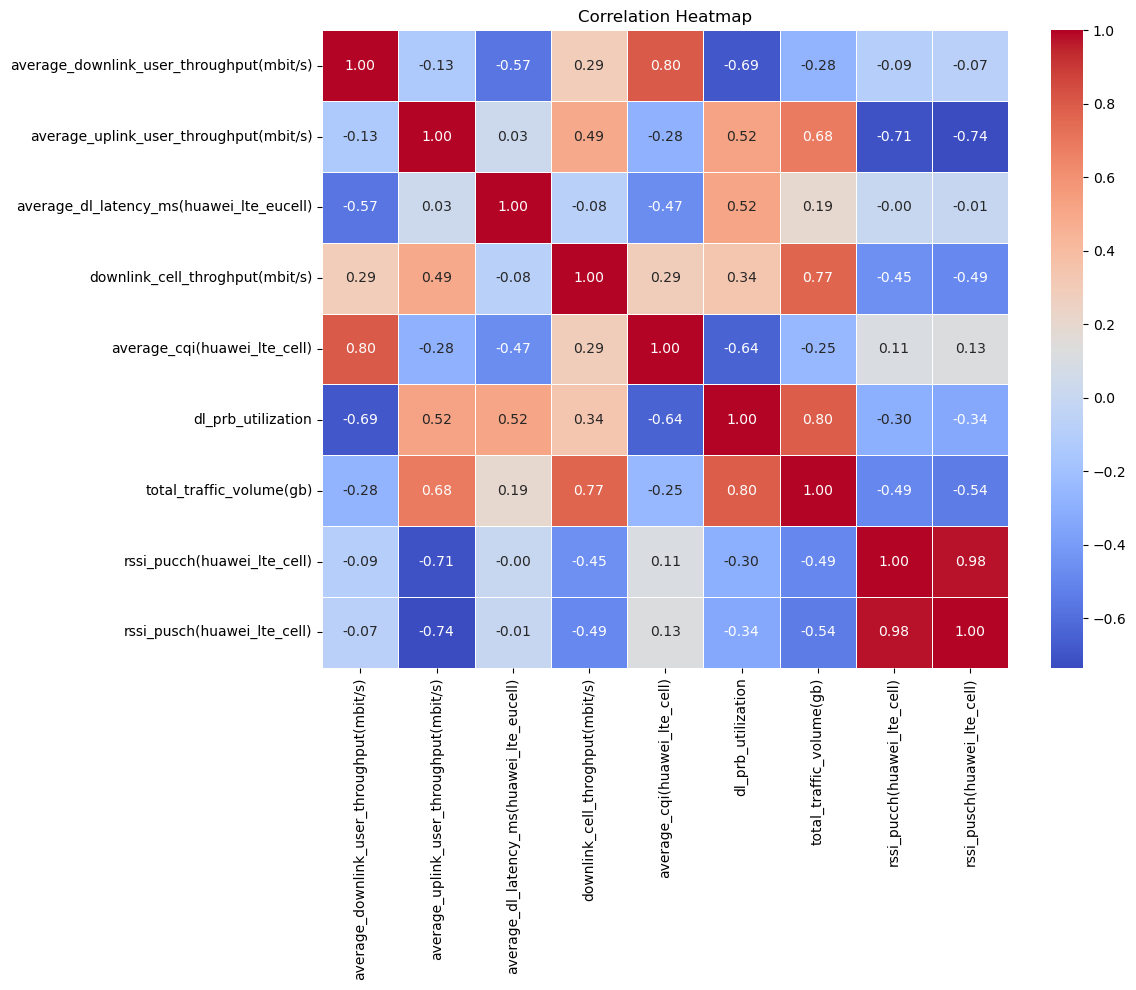

In [32]:
plt.figure(figsize=(12, 10))
sns.heatmap(correlations, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.savefig("Correlation Heatmap.png",dpi=300)
plt.show()


In [33]:
numeric_df1 = df1.select_dtypes(include=['float64', 'int64'])


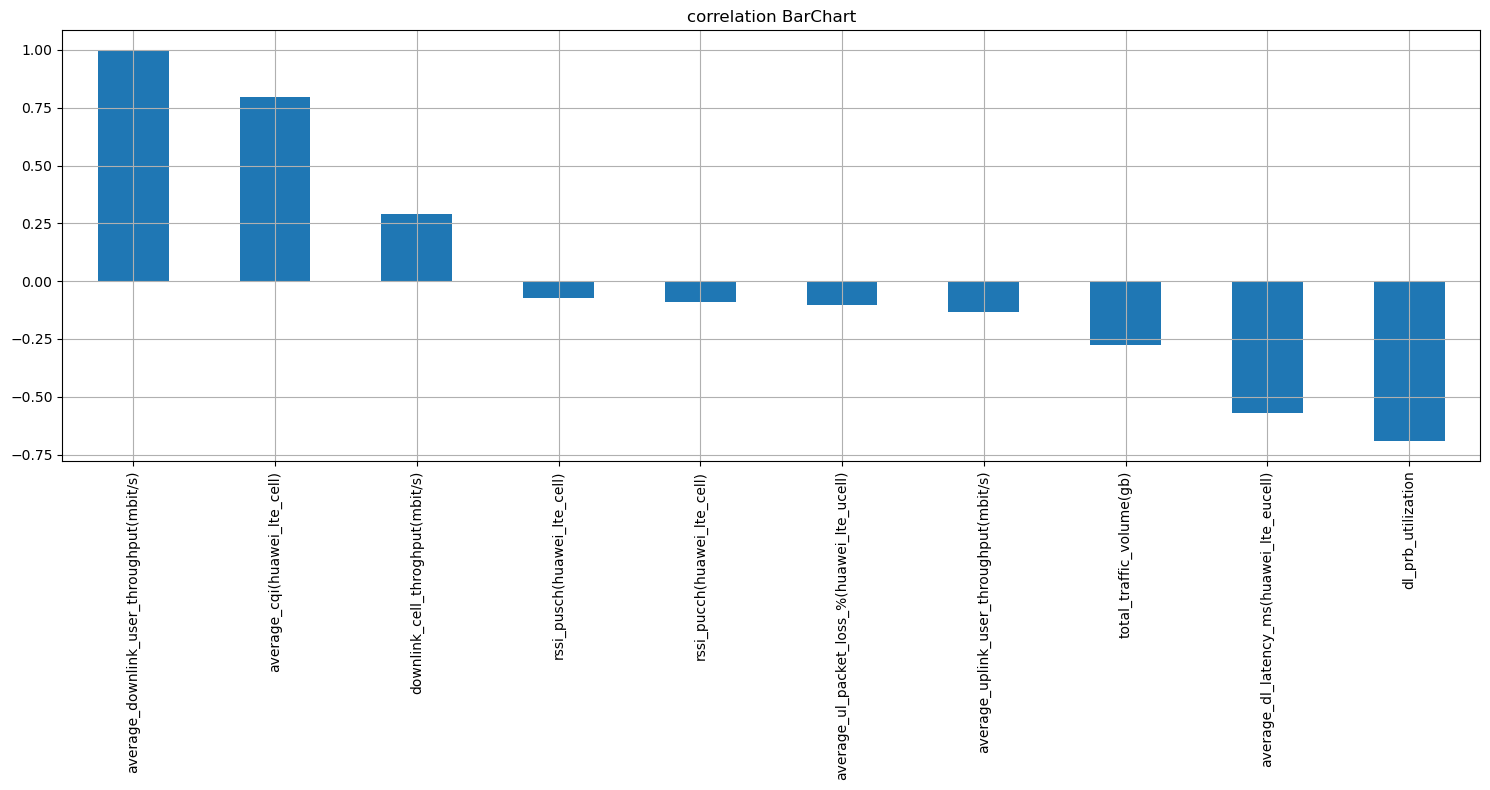

In [34]:
plt.figure(figsize=(15,8))
numeric_df1.corr()['average_downlink_user_throughput(mbit/s)'].sort_values(ascending=False).plot(kind='bar')
plt.title("correlation BarChart")
plt.grid(True)
plt.tight_layout()
plt.savefig("bar.correlation.png",dpi=400)
plt.show()

count    66743.000000
mean        25.572267
std          9.661894
min          6.311167
25%         18.701750
50%         23.859500
75%         30.505500
max         84.795000
Name: average_downlink_user_throughput(mbit/s), dtype: float64


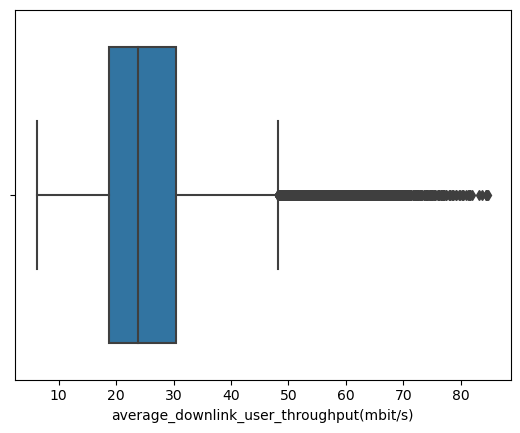

In [35]:
# BoxPlot for checking Outliers

sns.boxplot(x=df1['average_downlink_user_throughput(mbit/s)'])
shape = df1['average_downlink_user_throughput(mbit/s)'].describe()    
print(shape)  
plt.savefig("throughput-Outliers.png", dpi=300)
plt.show()

In [36]:

Q1 = df1['average_downlink_user_throughput(mbit/s)'].quantile(0.25)
Q3 = df1['average_downlink_user_throughput(mbit/s)'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df1[(df1['average_downlink_user_throughput(mbit/s)'] < lower_bound) | 
               (df1['average_downlink_user_throughput(mbit/s)'] > upper_bound)]

print(f"Outliers:\n{outliers}")
print(f"Number of outliers: {outliers.shape[0]}")

Outliers:
        DATETIME site_code city  average_downlink_user_throughput(mbit/s)  \
29    2024-05-01      0012   BU                                 48.588667   
88    2024-05-01      0036   QN                                 52.895333   
102   2024-05-01      0043   QN                                 70.387000   
105   2024-05-01      0044   QN                                 58.164667   
167   2024-05-01      0073   QN                                 63.066000   
...          ...       ...  ...                                       ...   
68511 2024-07-31      0378   BU                                 57.222333   
68537 2024-07-31      0400   QN                                 67.163333   
68539 2024-07-31      0404   BU                                 49.176333   
68549 2024-07-31      0411   QN                                 56.828000   
68611 2024-07-31      0508   BU                                 56.851333   

       average_uplink_user_throughput(mbit/s)  \
29              

In [38]:
def detect_outliers_iqr(df1, column):
    Q1 = df1[column].quantile(0.25)
    Q3 = df1[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df1[(df1[column] < lower_bound) | (df1[column] > upper_bound)]
    return outliers

# Loop over all numeric columns and detect outliers
numeric_columns = df1.select_dtypes(include=['float64', 'int64']).columns

for col in numeric_columns:
    outliers = detect_outliers_iqr(df1, col)
    print(f"Column: {col}, Outliers Detected: {outliers.shape[0]}")

Column: average_downlink_user_throughput(mbit/s), Outliers Detected: 2041
Column: average_uplink_user_throughput(mbit/s), Outliers Detected: 51
Column: average_dl_latency_ms(huawei_lte_eucell), Outliers Detected: 2286
Column: average_ul_packet_loss_%(huawei_lte_ucell), Outliers Detected: 8512
Column: average_cqi(huawei_lte_cell), Outliers Detected: 3
Column: dl_prb_utilization, Outliers Detected: 194
Column: total_traffic_volume(gb), Outliers Detected: 1132
Column: rssi_pucch(huawei_lte_cell), Outliers Detected: 91
Column: rssi_pusch(huawei_lte_cell), Outliers Detected: 20
Column: downlink_cell_throghput(mbit/s), Outliers Detected: 1263


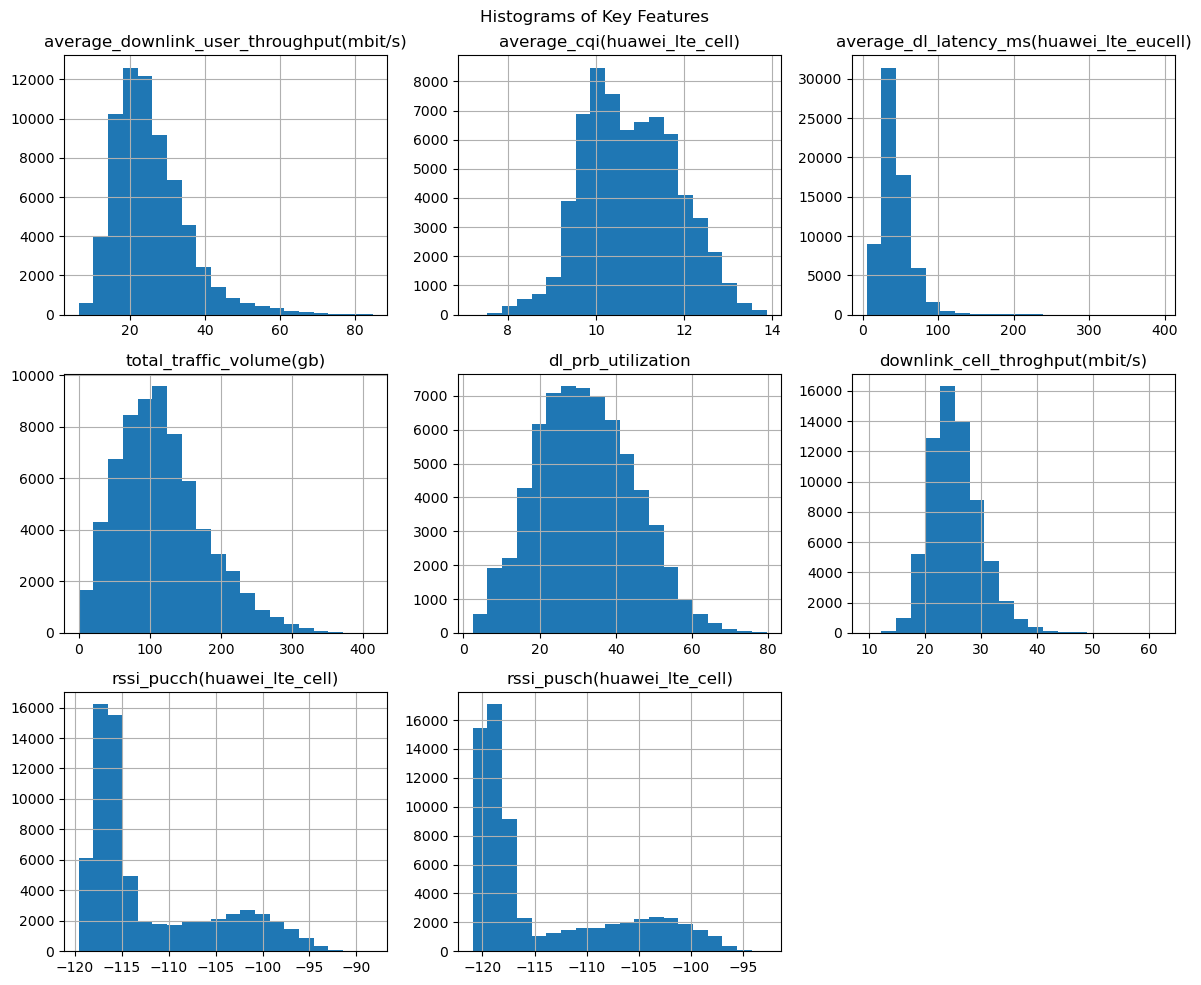

In [45]:
df1[['average_downlink_user_throughput(mbit/s)', 'average_cqi(huawei_lte_cell)', 
     'average_dl_latency_ms(huawei_lte_eucell)', 'total_traffic_volume(gb)', 
     'dl_prb_utilization','downlink_cell_throghput(mbit/s)','rssi_pucch(huawei_lte_cell)','rssi_pusch(huawei_lte_cell)']].hist(bins=20, figsize=(12, 10))
plt.suptitle('Histograms of Key Features')
plt.grid(True)
plt.tight_layout()
plt.savefig("Histograms of Key Features.png",dpi=400)
plt.show()

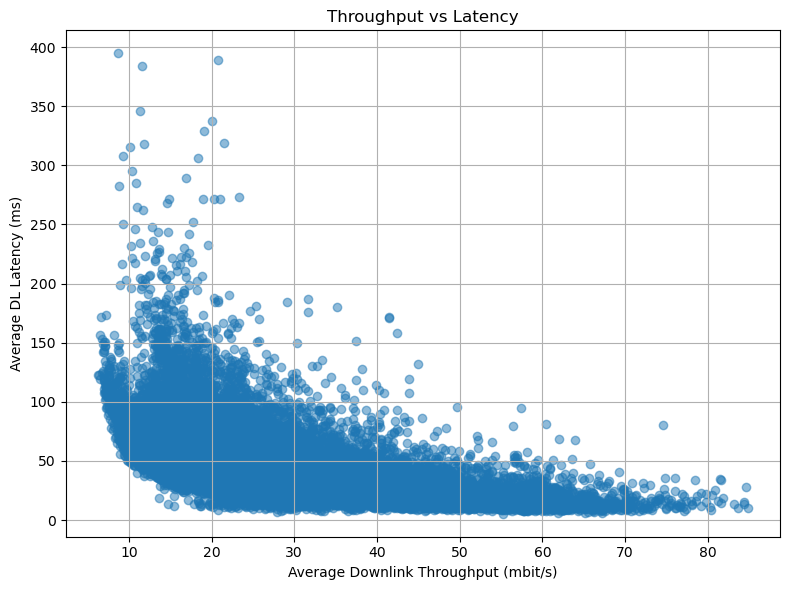

In [47]:
plt.figure(figsize=(8, 6))
plt.scatter(df1['average_downlink_user_throughput(mbit/s)'], df1['average_dl_latency_ms(huawei_lte_eucell)'], alpha=0.5)
plt.title('Throughput vs Latency')
plt.xlabel('Average Downlink Throughput (mbit/s)')
plt.ylabel('Average DL Latency (ms)')
plt.tight_layout()
plt.savefig("Throughput vs Latency.png",dpi=400)
plt.grid(True)
plt.show()

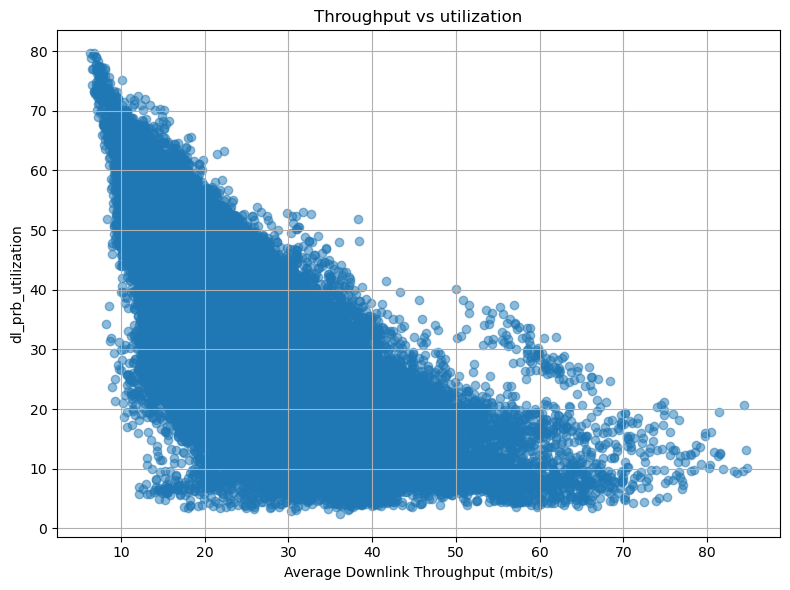

In [48]:
plt.figure(figsize=(8, 6))
plt.scatter(df1['average_downlink_user_throughput(mbit/s)'], df1['dl_prb_utilization'], alpha=0.5)
plt.title('Throughput vs utilization')
plt.xlabel('Average Downlink Throughput (mbit/s)')
plt.ylabel('dl_prb_utilization')
plt.tight_layout()
plt.savefig("Throughput vs utilization.png",dpi=400)
plt.grid(True)
plt.show()

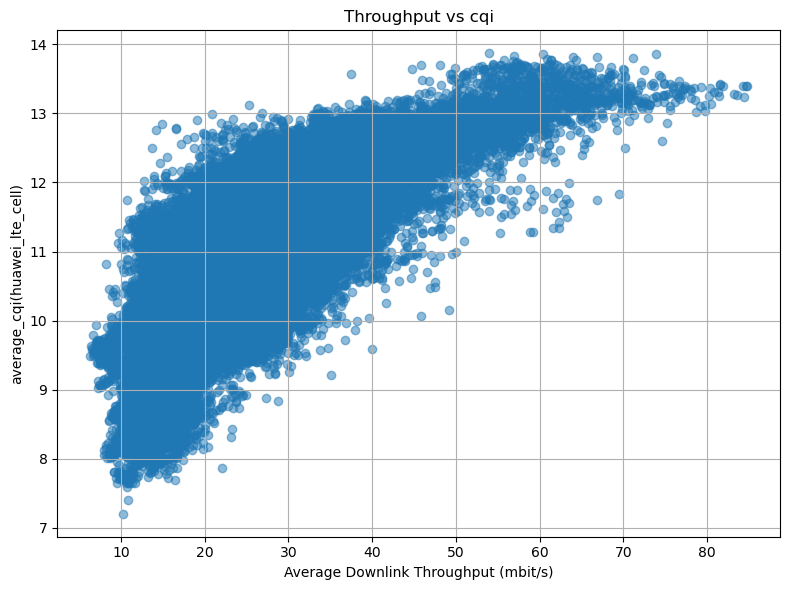

In [49]:
plt.figure(figsize=(8, 6))
plt.scatter(df1['average_downlink_user_throughput(mbit/s)'], df1['average_cqi(huawei_lte_cell)'], alpha=0.5)
plt.title('Throughput vs cqi')
plt.xlabel('Average Downlink Throughput (mbit/s)')
plt.ylabel('average_cqi(huawei_lte_cell)')
plt.tight_layout()
plt.savefig("Throughput vs cqi.png",dpi=400)
plt.grid(True)
plt.show()

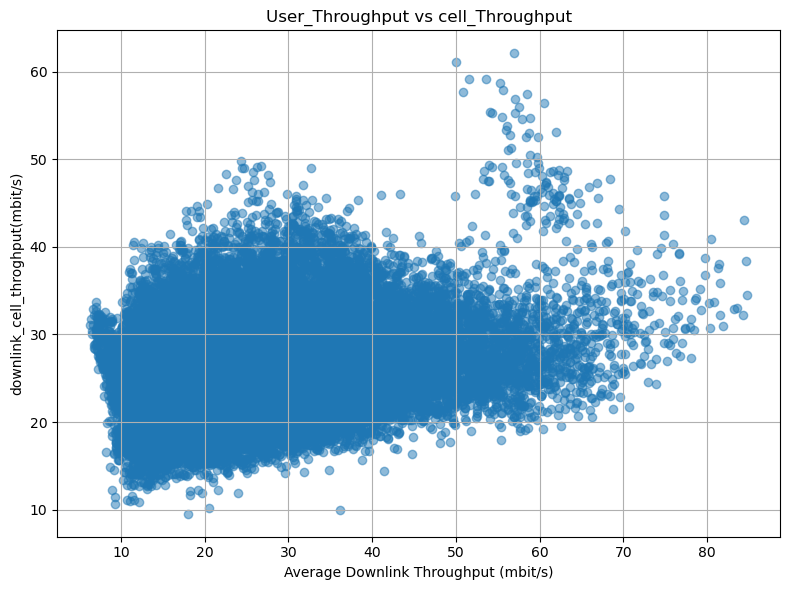

In [50]:
plt.figure(figsize=(8, 6))
plt.scatter(df1['average_downlink_user_throughput(mbit/s)'], df1['downlink_cell_throghput(mbit/s)'], alpha=0.5)
plt.title('User_Throughput vs cell_Throughput')
plt.xlabel('Average Downlink Throughput (mbit/s)')
plt.ylabel('downlink_cell_throghput(mbit/s)')
plt.tight_layout()
plt.savefig("User_Throughput vs cell_Throughput.png",dpi=400)
plt.grid(True)
plt.show()

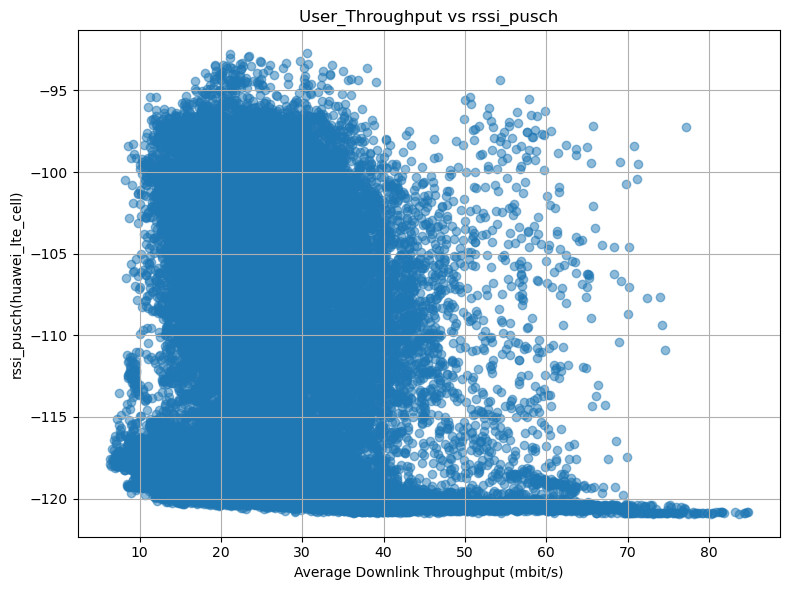

In [52]:
plt.figure(figsize=(8, 6))
plt.scatter(df1['average_downlink_user_throughput(mbit/s)'], df1['rssi_pusch(huawei_lte_cell)'], alpha=0.5)
plt.title('User_Throughput vs rssi_pusch')
plt.xlabel('Average Downlink Throughput (mbit/s)')
plt.ylabel('rssi_pusch(huawei_lte_cell)')
plt.tight_layout()
plt.savefig("User_Throughput vs rssi_pusch.png",dpi=400)
plt.grid(True)
plt.show()

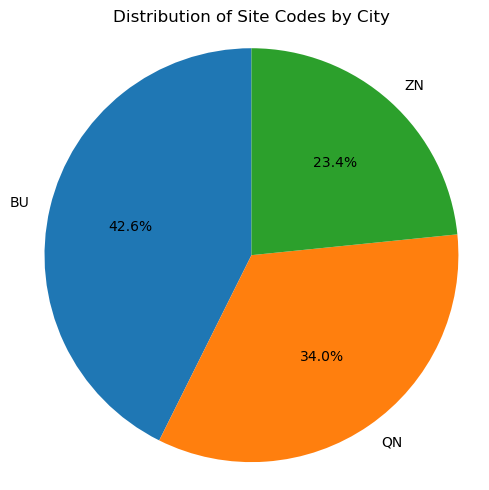

In [55]:
# counts the number of unique site codes in each city

site_count_by_city = df1.groupby('city')['site_code'].nunique()
plt.figure(figsize=(5, 5))
plt.pie(site_count_by_city, labels=site_count_by_city.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Site Codes by City')
plt.axis('equal')  
plt.tight_layout()
plt.savefig("Distribution of Site Codes by City.png",dpi=400)
plt.show()

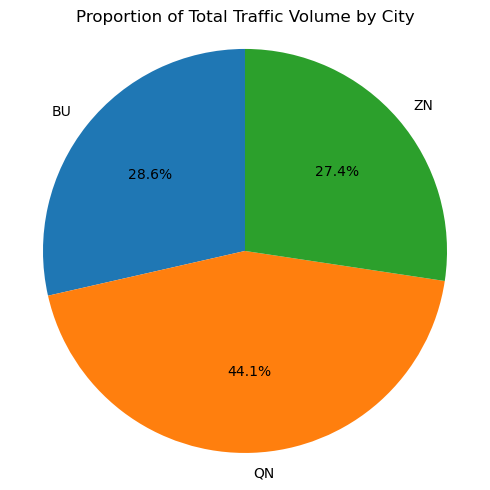

In [61]:
#calculates the total traffic volume for each city

traffic_volume_by_city = df1.groupby('city')['total_traffic_volume(gb)'].sum()
plt.figure(figsize=(5, 5))
plt.pie(traffic_volume_by_city, labels=traffic_volume_by_city.index, autopct='%1.1f%%', startangle=90)
plt.title('Proportion of Total Traffic Volume by City')
plt.axis('equal')
plt.tight_layout()
plt.savefig("Proportion of Total Traffic Volume by City.png",dpi=400)
plt.show()

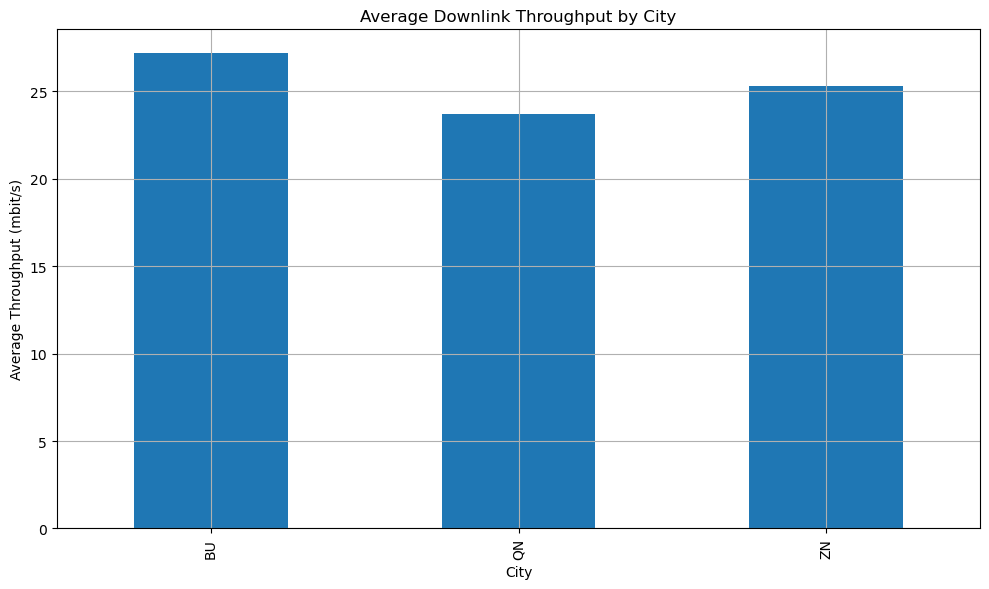

In [58]:
avg_throughput_by_city = df1.groupby('city')['average_downlink_user_throughput(mbit/s)'].mean()

plt.figure(figsize=(10, 6))
avg_throughput_by_city.plot(kind='bar')
plt.title('Average Downlink Throughput by City')
plt.xlabel('City')
plt.ylabel('Average Throughput (mbit/s)')
plt.grid(True)
plt.tight_layout()
plt.savefig("Proportion of Total Traffic Volume by City.png",dpi=400)
plt.show()

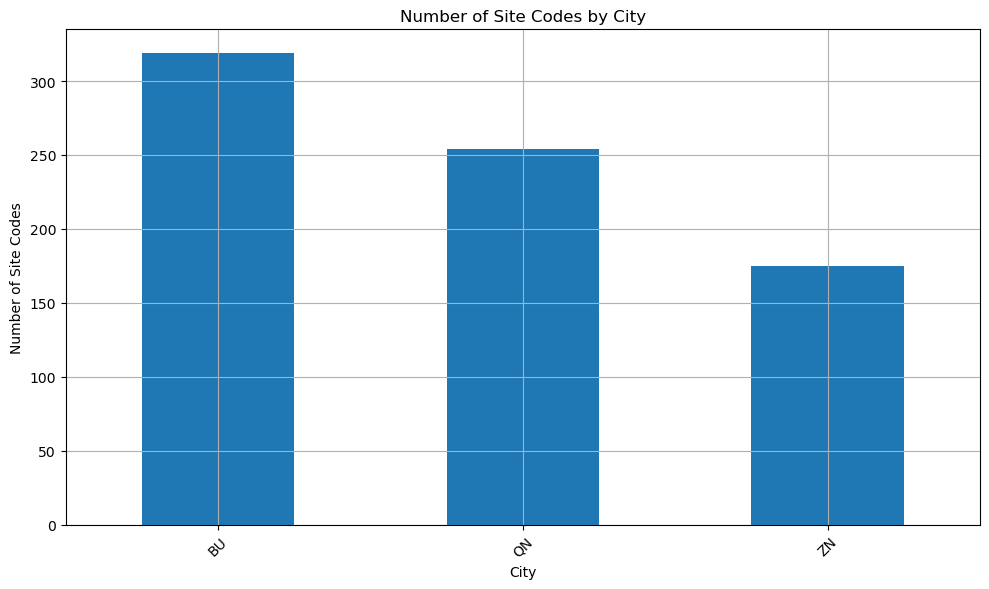

In [65]:
site_count_by_city = df1.groupby('city')['site_code'].nunique()

plt.figure(figsize=(10, 6))
site_count_by_city.plot(kind='bar')
plt.title('Number of Site Codes by City')
plt.xlabel('City')
plt.ylabel('Number of Site Codes')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("Number of Site Codes by City.png",dpi=400)
plt.show()

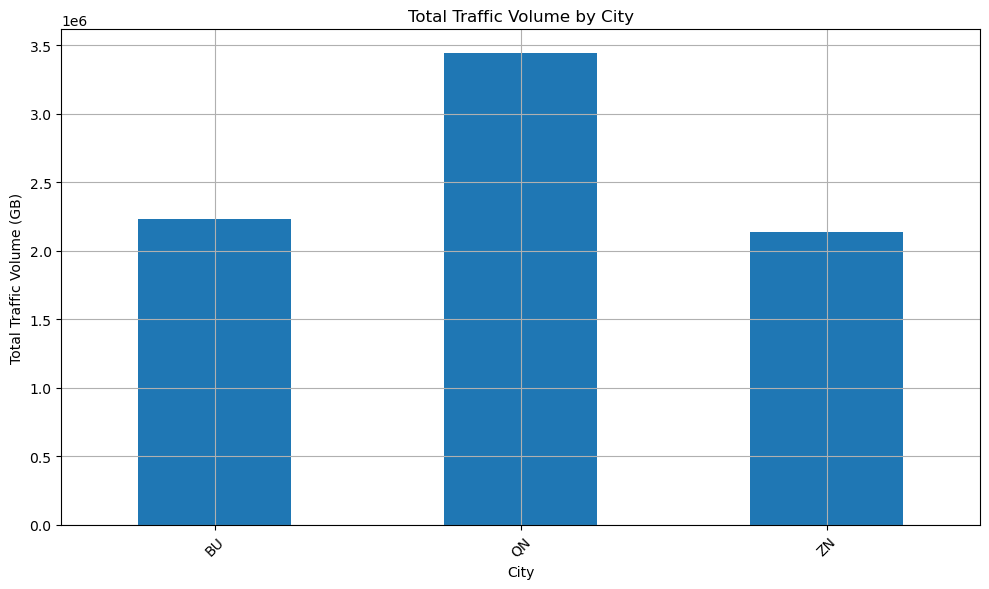

In [64]:
traffic_volume_by_city = df1.groupby('city')['total_traffic_volume(gb)'].sum()

# Plot bar chart
plt.figure(figsize=(10, 6))
traffic_volume_by_city.plot(kind='bar')
plt.title('Total Traffic Volume by City')
plt.xlabel('City')
plt.ylabel('Total Traffic Volume (GB)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("Total Traffic Volume by City.png",dpi=400)
plt.show()

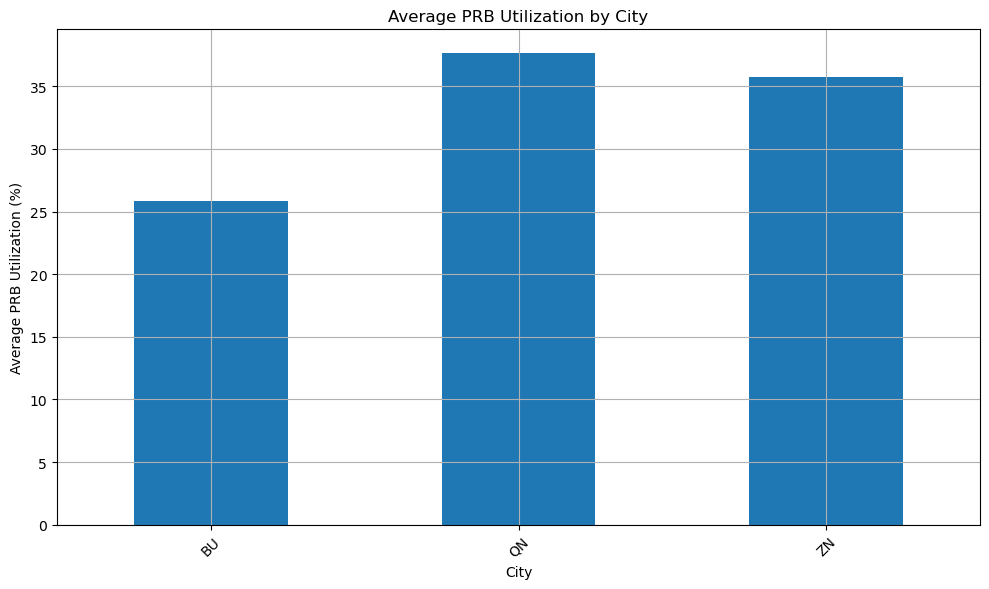

In [68]:
# Group by city and calculate average PRB utilization

avg_prb_by_city = df1.groupby('city')['dl_prb_utilization'].mean()
plt.figure(figsize=(10, 6))
avg_prb_by_city.plot(kind='bar')
plt.title('Average PRB Utilization by City')
plt.xlabel('City')
plt.ylabel('Average PRB Utilization (%)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("Average PRB Utilization by City.png",dpi=400)
plt.show()

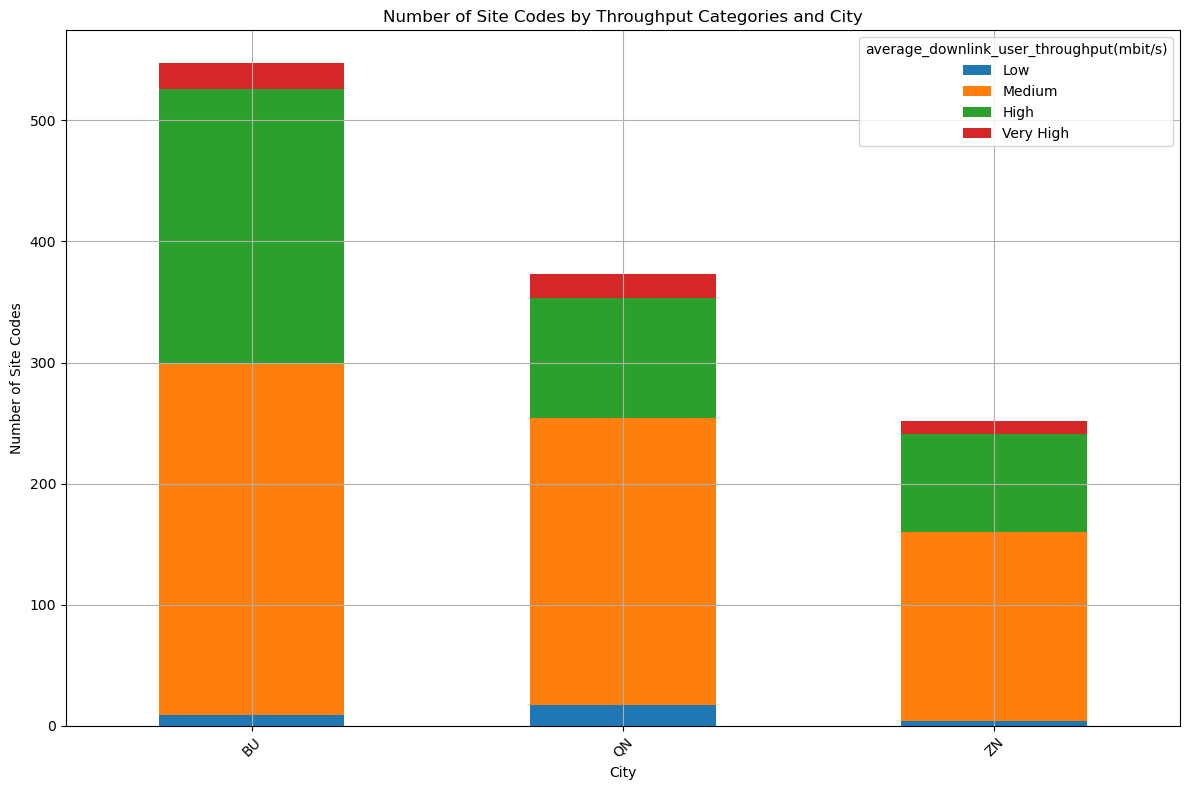

In [70]:
throughput_bins = pd.cut(df1['average_downlink_user_throughput(mbit/s)'], bins=[0, 10, 30, 50, 100], labels=['Low', 'Medium', 'High', 'Very High'])

# Count site codes in each throughput category by city
throughput_categories_by_city = df1.groupby(['city', throughput_bins])['site_code'].nunique().unstack()

# Plot the bar chart for each city
throughput_categories_by_city.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Number of Site Codes by Throughput Categories and City')
plt.xlabel('City')
plt.ylabel('Number of Site Codes')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("Number of Site Codes by Throughput Categories and City.png",dpi=400)
plt.show()

C:\Users\OH\AppData\Local\Temp\ipykernel_13980\4208152733.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(avg_user_throughput_by_city.index, rotation=45)


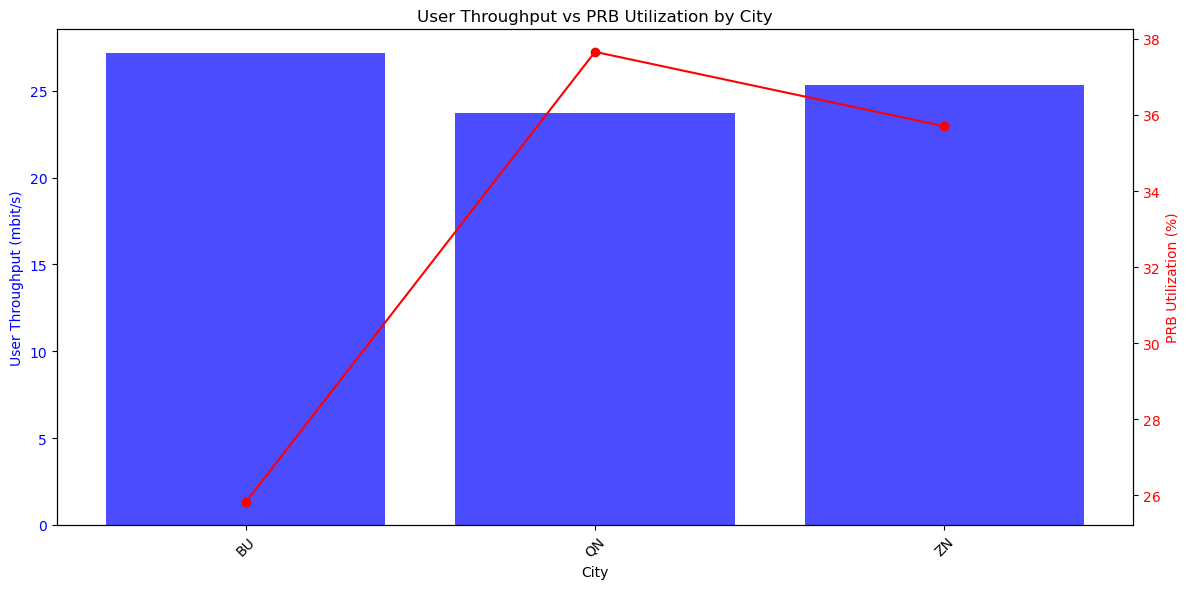

In [75]:
# Group by city and calculate average throughput and PRB utilization

avg_user_throughput_by_city = df1.groupby('city')['average_downlink_user_throughput(mbit/s)'].mean()
avg_prb_utilization_by_city = df1.groupby('city')['dl_prb_utilization'].mean()

fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.bar(avg_user_throughput_by_city.index, avg_user_throughput_by_city, label='User Throughput (mbit/s)', alpha=0.7, color='b')
ax1.set_xlabel('City')
ax1.set_ylabel('User Throughput (mbit/s)', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.set_xticklabels(avg_user_throughput_by_city.index, rotation=45)

ax2 = ax1.twinx()  
ax2.plot(avg_prb_utilization_by_city.index, avg_prb_utilization_by_city, label='PRB Utilization (%)', color='r', marker='o')
ax2.set_ylabel('PRB Utilization (%)', color='r')
ax2.tick_params(axis='y', labelcolor='r')

plt.title('User Throughput vs PRB Utilization by City')
fig.tight_layout()
plt.savefig("User Throughput vs PRB Utilization by City.png",dpi=400)
plt.show()

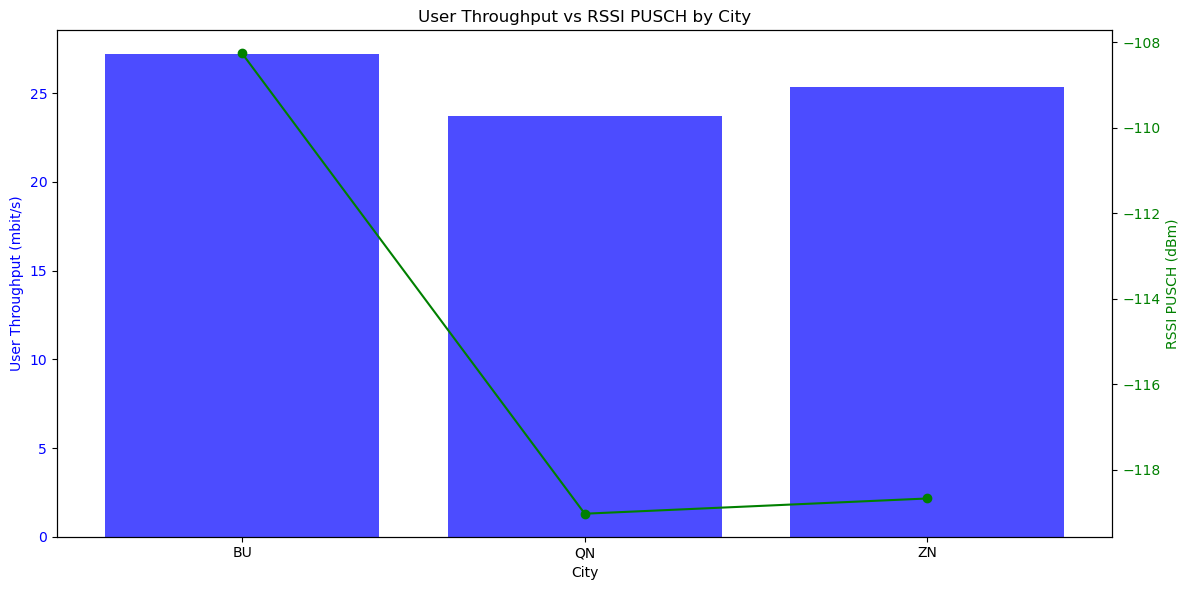

In [80]:
# Group by city and calculate average user throughput and RSSI

avg_user_throughput_by_city = df1.groupby('city')['average_downlink_user_throughput(mbit/s)'].mean()
avg_rssi_by_city = df1.groupby('city')['rssi_pusch(huawei_lte_cell)'].mean()

fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.bar(avg_user_throughput_by_city.index, avg_user_throughput_by_city, label='User Throughput (mbit/s)', color='b', alpha=0.7)
ax1.set_xlabel('City')
ax1.set_ylabel('User Throughput (mbit/s)', color='b')
ax1.tick_params(axis='y', labelcolor='b')

ax2 = ax1.twinx()
ax2.plot(avg_rssi_by_city.index, avg_rssi_by_city, label='RSSI PUSCH (dBm)', color='g', marker='o')
ax2.set_ylabel('RSSI PUSCH (dBm)', color='g')  
ax2.tick_params(axis='y', labelcolor='g')

plt.title('User Throughput vs RSSI PUSCH by City')
fig.tight_layout()
plt.savefig("User Throughput vs RSSI PUSCH by City.png",dpi=400)
plt.show()


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\OH\AppData\Local\Temp\ipykernel_13980\1311442329.py:4: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


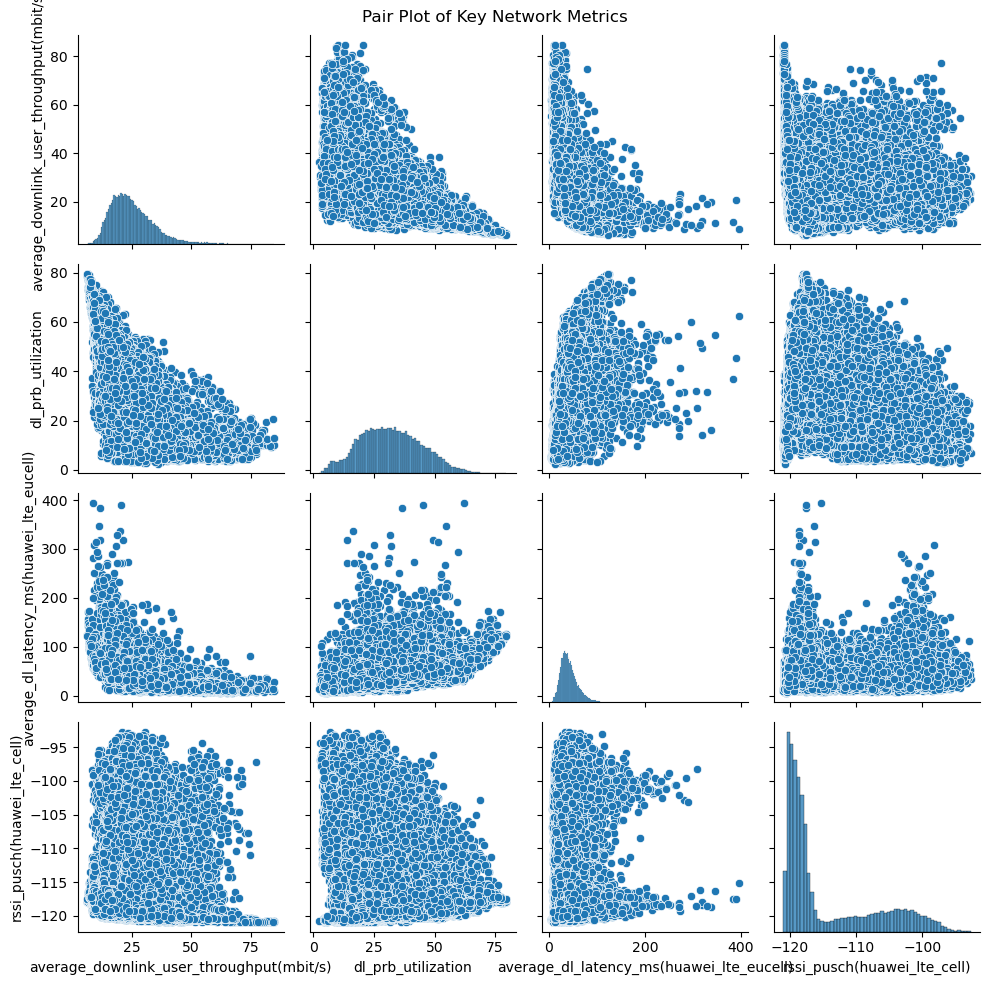

In [85]:
sns.pairplot(df1[['average_downlink_user_throughput(mbit/s)', 'dl_prb_utilization', 
                  'average_dl_latency_ms(huawei_lte_eucell)', 'rssi_pusch(huawei_lte_cell)']])
plt.suptitle('Pair Plot of Key Network Metrics')
plt.tight_layout()
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\OH\AppData\Local\Temp\ipykernel_13980\1343565722.py:10: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


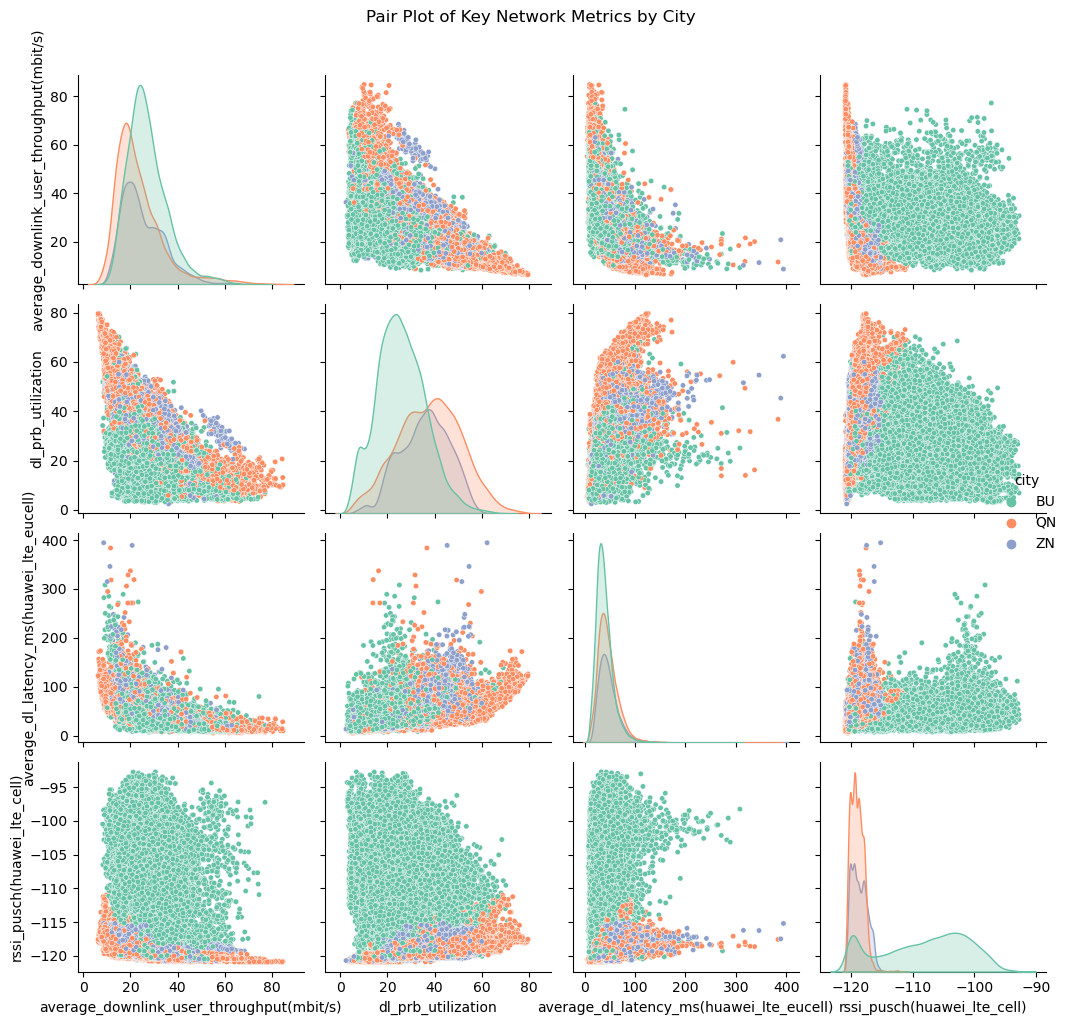

In [86]:
# Select key numeric columns and the city column
df_selected = df1[['average_downlink_user_throughput(mbit/s)', 'dl_prb_utilization', 
                   'average_dl_latency_ms(huawei_lte_eucell)', 'rssi_pusch(huawei_lte_cell)', 'city']]

# Generate the pair plot with city as the hue
sns.pairplot(df_selected, hue='city', palette='Set2', diag_kind='kde', plot_kws={'s': 15})


plt.suptitle('Pair Plot of Key Network Metrics by City', y=1.02)  
plt.tight_layout()
plt.savefig("Pair Plot of Key Network Metrics by City.png",dpi=400)
plt.show()

In [ ]:
#Trend Analyzing

In [98]:
from prophet import Prophet

In [99]:
import matplotlib.pyplot as plt

In [100]:
df_prophet = df1[['DATETIME', 'average_downlink_user_throughput(mbit/s)']].rename(columns={'DATETIME': 'ds', 'average_downlink_user_throughput(mbit/s)': 'y'})

print(df_prophet.head())

          ds          y
0 2024-05-01  13.071000
1 2024-05-01  26.299833
2 2024-05-01  14.087333
3 2024-05-01  11.330833
4 2024-05-01  11.176000


In [101]:
model = Prophet()
model.fit(df_prophet)

09:47:46 - cmdstanpy - INFO - Chain [1] start processing
09:48:05 - cmdstanpy - INFO - Chain [1] done processing


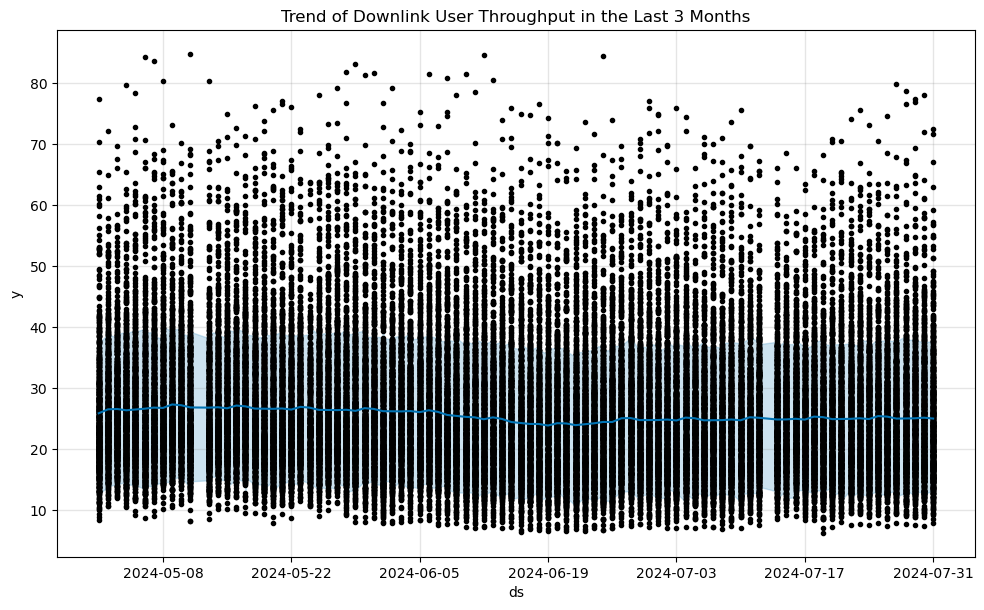

C:\Users\OH\AppData\Local\Temp\ipykernel_13980\1305422073.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


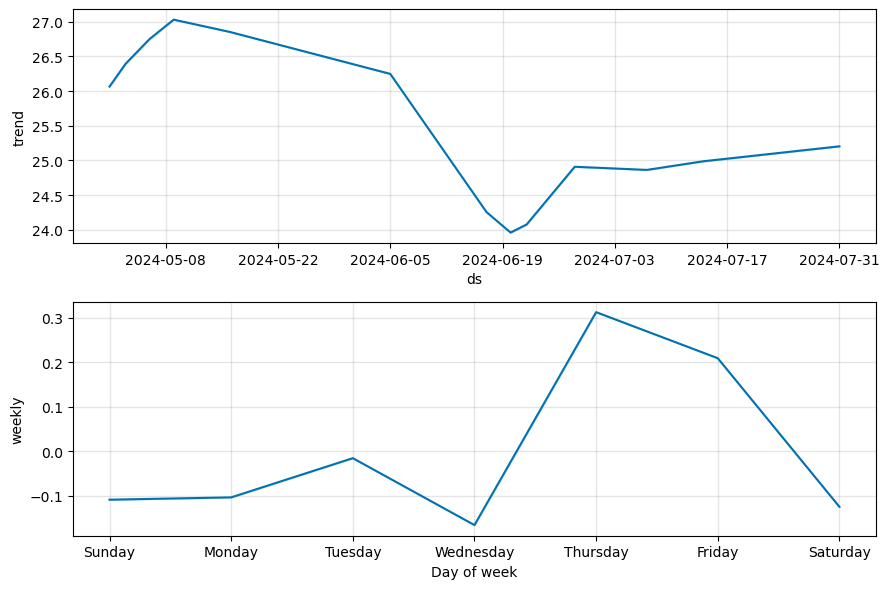

In [103]:
forecast = model.predict(df_prophet) 
model.plot(forecast)
plt.title('Trend of Downlink User Throughput in the Last 3 Months')
plt.show()


model.plot_components(forecast)
plt.grid(True)
plt.tight_layout()
plt.savefig("Trend of Downlink User Throughput in the Last 3 Months.png",dpi=400)
plt.show()

In [104]:
from statsmodels.tsa.arima.model import ARIMA

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                                          SARIMAX Results                                           
Dep. Variable:     average_downlink_user_throughput(mbit/s)   No. Observations:                66743
Model:                                       ARIMA(1, 1, 1)   Log Likelihood             -245336.084
Date:                                      Wed, 18 Sep 2024   AIC                         490678.167
Time:                                              10:03:44   BIC                         490705.493
Sample:                                                   0   HQIC                        490686.613
                                                    - 66743                                         
Covariance Type:                                        opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0660      0.004  

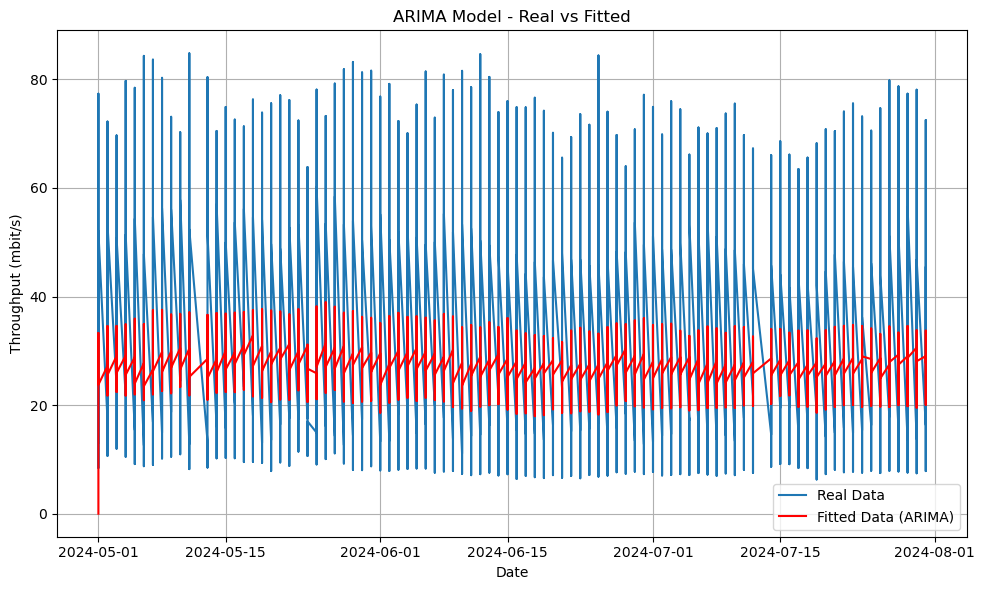

In [105]:

data = df1[['DATETIME', 'average_downlink_user_throughput(mbit/s)']].set_index('DATETIME')

model = ARIMA(data, order=(1, 1, 1))
model_fit = model.fit()
print(model_fit.summary())

data['Fitted'] = model_fit.fittedvalues

plt.figure(figsize=(10,6))
plt.plot(data.index, data['average_downlink_user_throughput(mbit/s)'], label='Real Data')
plt.plot(data.index, data['Fitted'], color='red', label='Fitted Data (ARIMA)')
plt.title('ARIMA Model - Real vs Fitted')
plt.xlabel('Date')
plt.ylabel('Throughput (mbit/s)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("Trend of Downlink User Throughput in the Last 3 Months-ARIMA.png",dpi=400)
plt.show()

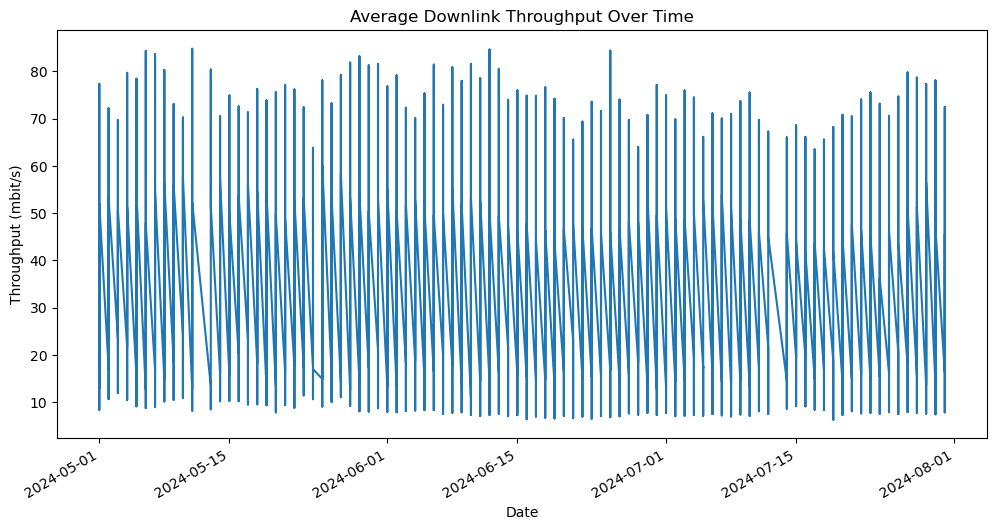

In [106]:
df1.set_index('DATETIME')['average_downlink_user_throughput(mbit/s)'].plot(figsize=(12, 6))
plt.title('Average Downlink Throughput Over Time')
plt.ylabel('Throughput (mbit/s)')
plt.xlabel('Date')
plt.show()

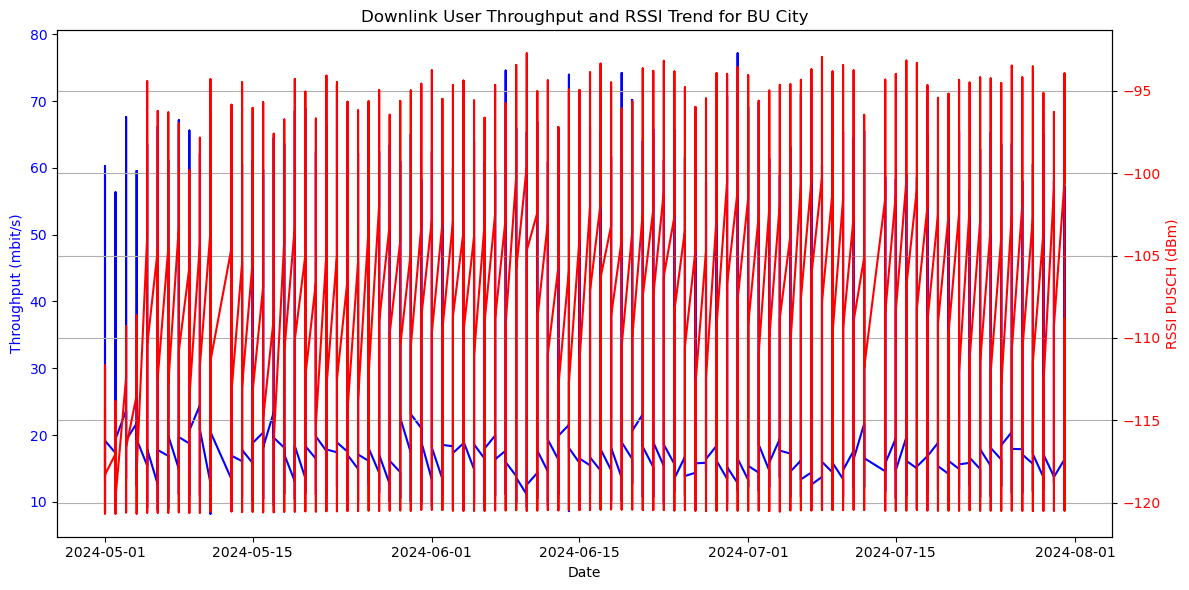

In [107]:
df_bu = df1[df1['city'] == 'BU']

df_bu = df_bu.set_index('DATETIME')
fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.plot(df_bu.index, df_bu['average_downlink_user_throughput(mbit/s)'], color='b', label='Downlink User Throughput')
ax1.set_xlabel('Date')
ax1.set_ylabel('Throughput (mbit/s)', color='b')
ax1.tick_params(axis='y', labelcolor='b')

ax2 = ax1.twinx()
ax2.plot(df_bu.index, df_bu['rssi_pusch(huawei_lte_cell)'], color='r', label='RSSI PUSCH (dBm)')
ax2.set_ylabel('RSSI PUSCH (dBm)', color='r')
ax2.tick_params(axis='y', labelcolor='r')

plt.title('Downlink User Throughput and RSSI Trend for BU City')
fig.tight_layout()
plt.grid(True)
plt.savefig("Downlink User Throughput and RSSI Trend for BU City.png",dpi=400)
plt.show()

10:23:50 - cmdstanpy - INFO - Chain [1] start processing
10:23:55 - cmdstanpy - INFO - Chain [1] done processing
10:24:15 - cmdstanpy - INFO - Chain [1] start processing
10:24:34 - cmdstanpy - INFO - Chain [1] done processing


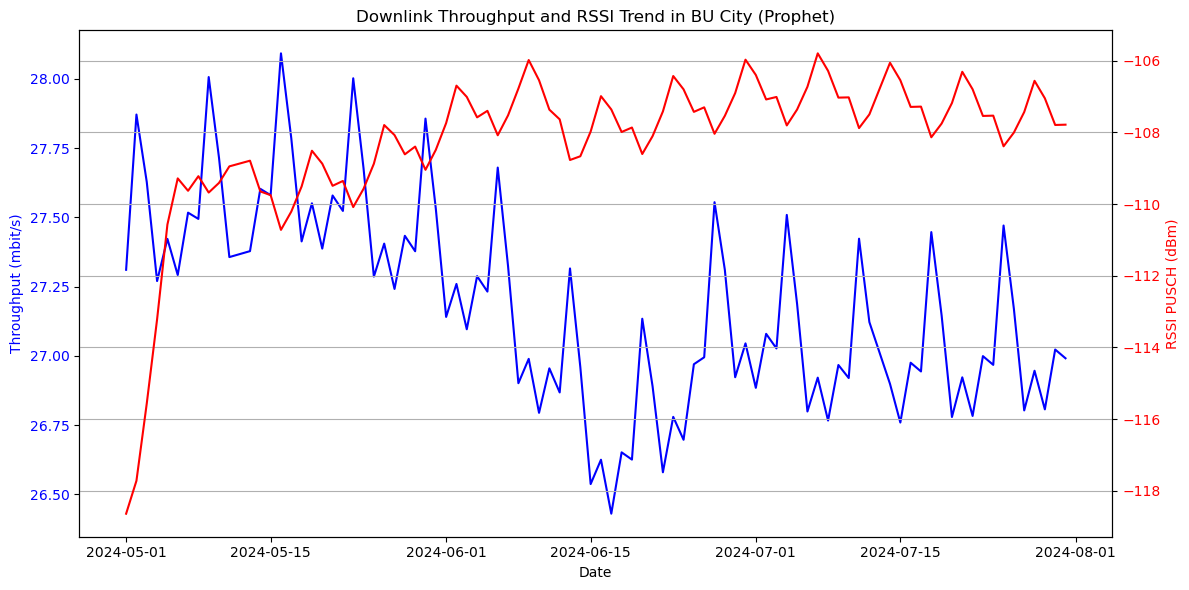

In [108]:


df_bu = df1[df1['city'] == 'BU']

df_throughput = df_bu[['DATETIME', 'average_downlink_user_throughput(mbit/s)']].rename(columns={'DATETIME': 'ds', 'average_downlink_user_throughput(mbit/s)': 'y'})
model_throughput = Prophet()
model_throughput.fit(df_throughput)
forecast_throughput = model_throughput.predict(df_throughput)


df_rssi = df_bu[['DATETIME', 'rssi_pusch(huawei_lte_cell)']].rename(columns={'DATETIME': 'ds', 'rssi_pusch(huawei_lte_cell)': 'y'})
model_rssi = Prophet()
model_rssi.fit(df_rssi)
forecast_rssi = model_rssi.predict(df_rssi)

fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.plot(df_throughput['ds'], forecast_throughput['yhat'], color='b', label='Throughput Trend')
ax1.set_xlabel('Date')
ax1.set_ylabel('Throughput (mbit/s)', color='b')
ax1.tick_params(axis='y', labelcolor='b')

ax2 = ax1.twinx()
ax2.plot(df_rssi['ds'], forecast_rssi['yhat'], color='r', label='RSSI Trend')
ax2.set_ylabel('RSSI PUSCH (dBm)', color='r')
ax2.tick_params(axis='y', labelcolor='r')

plt.title('Downlink Throughput and RSSI Trend in BU City (Prophet)')
fig.tight_layout()
plt.grid(True)
plt.savefig("Downlink Throughput and RSSI Trend in BU City (Prophet).png",dpi=400)
plt.show()


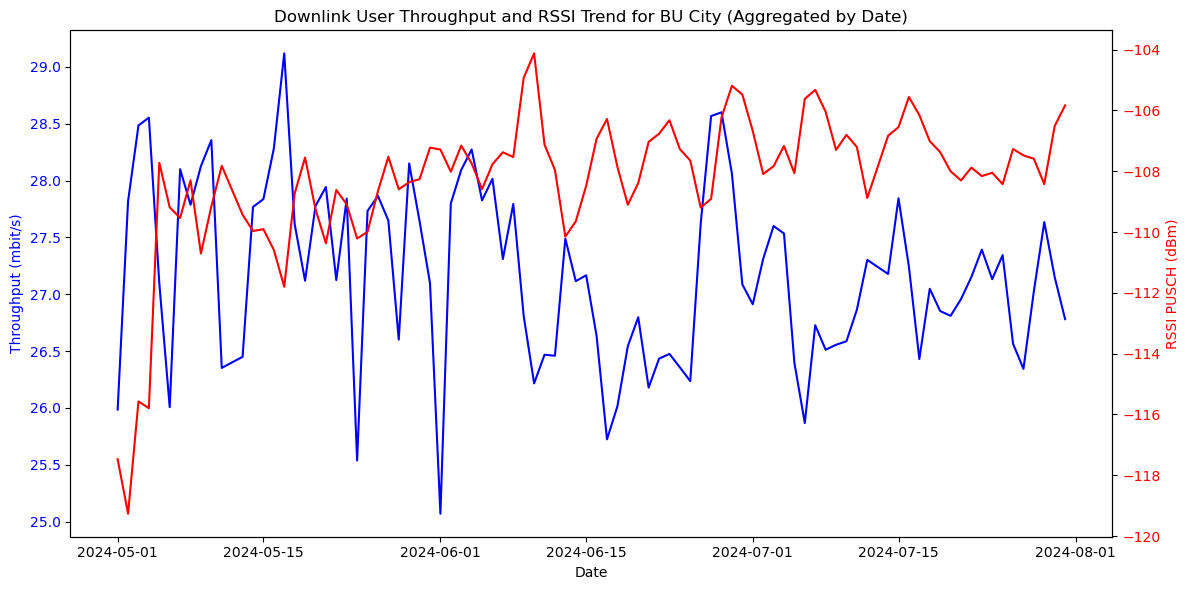

In [109]:


df_bu = df1[df1['city'] == 'BU']
df_bu_grouped = df_bu.groupby('DATETIME').agg({
    'average_downlink_user_throughput(mbit/s)': 'mean',
    'rssi_pusch(huawei_lte_cell)': 'mean'
})

df_bu_grouped = df_bu_grouped.reset_index()

fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.plot(df_bu_grouped['DATETIME'], df_bu_grouped['average_downlink_user_throughput(mbit/s)'], color='b', label='Downlink User Throughput')
ax1.set_xlabel('Date')
ax1.set_ylabel('Throughput (mbit/s)', color='b')
ax1.tick_params(axis='y', labelcolor='b')


ax2 = ax1.twinx()
ax2.plot(df_bu_grouped['DATETIME'], df_bu_grouped['rssi_pusch(huawei_lte_cell)'], color='r', label='RSSI PUSCH (dBm)')
ax2.set_ylabel('RSSI PUSCH (dBm)', color='r')
ax2.tick_params(axis='y', labelcolor='r')

plt.title('Downlink User Throughput and RSSI Trend for BU City (Aggregated by Date)')
fig.tight_layout()
plt.show()


10:53:38 - cmdstanpy - INFO - Chain [1] start processing
10:53:42 - cmdstanpy - INFO - Chain [1] done processing
10:54:00 - cmdstanpy - INFO - Chain [1] start processing
10:54:03 - cmdstanpy - INFO - Chain [1] done processing


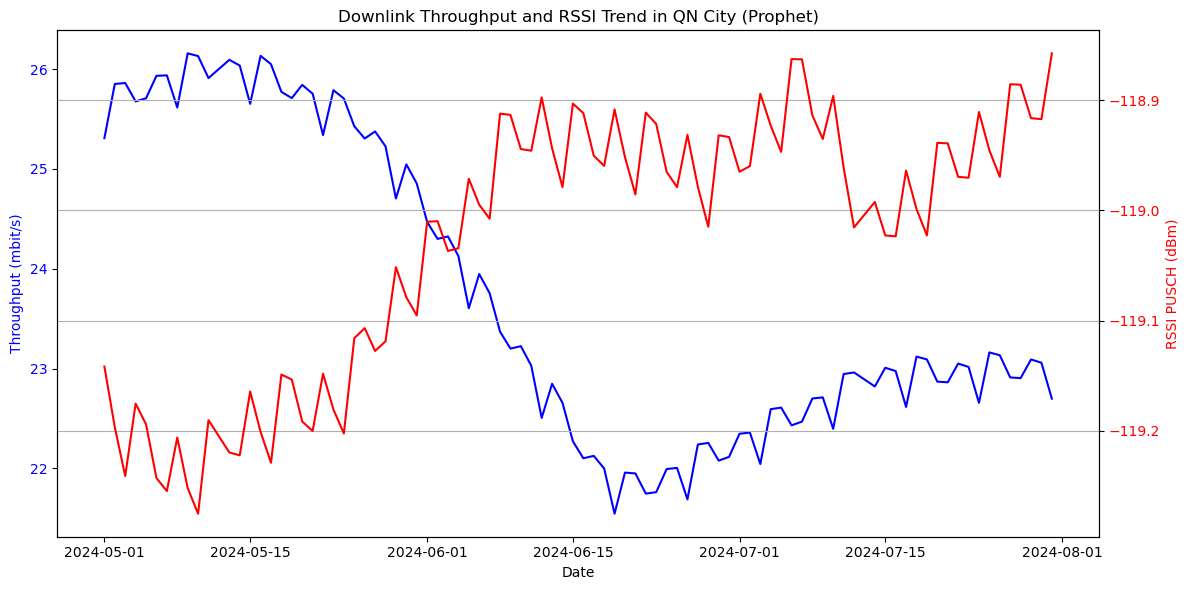

In [110]:
df_bu = df1[df1['city'] == 'QN']

df_throughput = df_bu[['DATETIME', 'average_downlink_user_throughput(mbit/s)']].rename(columns={'DATETIME': 'ds', 'average_downlink_user_throughput(mbit/s)': 'y'})
model_throughput = Prophet()
model_throughput.fit(df_throughput)
forecast_throughput = model_throughput.predict(df_throughput)


df_rssi = df_bu[['DATETIME', 'rssi_pusch(huawei_lte_cell)']].rename(columns={'DATETIME': 'ds', 'rssi_pusch(huawei_lte_cell)': 'y'})
model_rssi = Prophet()
model_rssi.fit(df_rssi)
forecast_rssi = model_rssi.predict(df_rssi)

fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.plot(df_throughput['ds'], forecast_throughput['yhat'], color='b', label='Throughput Trend')
ax1.set_xlabel('Date')
ax1.set_ylabel('Throughput (mbit/s)', color='b')
ax1.tick_params(axis='y', labelcolor='b')

ax2 = ax1.twinx()
ax2.plot(df_rssi['ds'], forecast_rssi['yhat'], color='r', label='RSSI Trend')
ax2.set_ylabel('RSSI PUSCH (dBm)', color='r')
ax2.tick_params(axis='y', labelcolor='r')

plt.title('Downlink Throughput and RSSI Trend in QN City (Prophet)')
fig.tight_layout()
plt.grid(True)
plt.savefig("Downlink Throughput and RSSI Trend in QN City (Prophet).png",dpi=400)
plt.show()

11:00:32 - cmdstanpy - INFO - Chain [1] start processing
11:00:35 - cmdstanpy - INFO - Chain [1] done processing
11:00:46 - cmdstanpy - INFO - Chain [1] start processing
11:00:48 - cmdstanpy - INFO - Chain [1] done processing


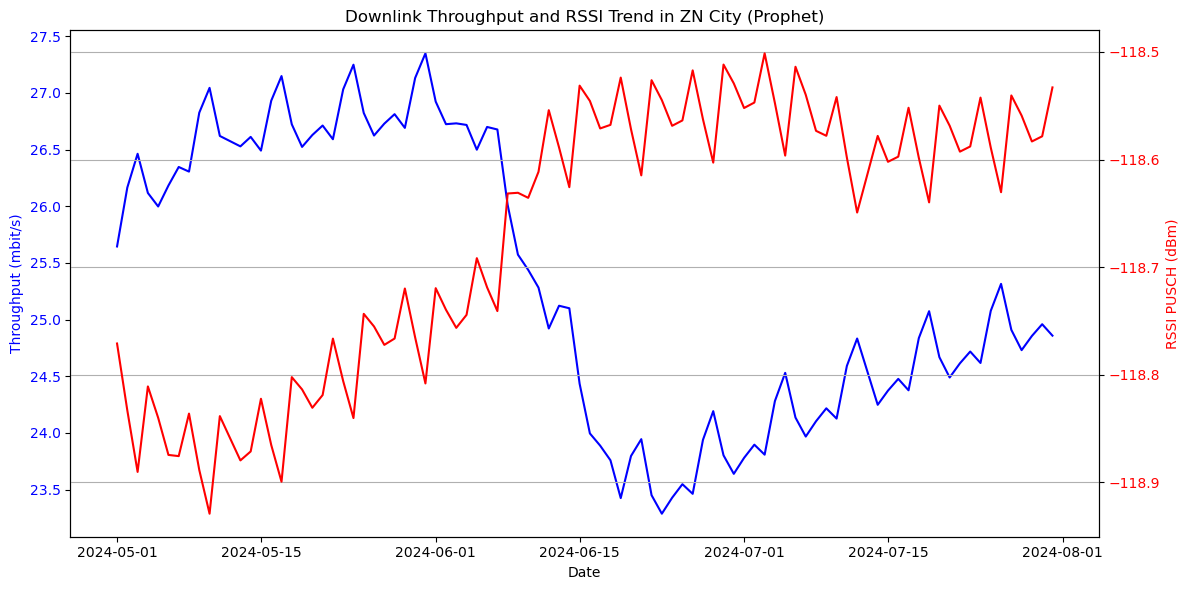

In [111]:
df_bu = df1[df1['city'] == 'ZN']

df_throughput = df_bu[['DATETIME', 'average_downlink_user_throughput(mbit/s)']].rename(columns={'DATETIME': 'ds', 'average_downlink_user_throughput(mbit/s)': 'y'})
model_throughput = Prophet()
model_throughput.fit(df_throughput)
forecast_throughput = model_throughput.predict(df_throughput)


df_rssi = df_bu[['DATETIME', 'rssi_pusch(huawei_lte_cell)']].rename(columns={'DATETIME': 'ds', 'rssi_pusch(huawei_lte_cell)': 'y'})
model_rssi = Prophet()
model_rssi.fit(df_rssi)
forecast_rssi = model_rssi.predict(df_rssi)

fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.plot(df_throughput['ds'], forecast_throughput['yhat'], color='b', label='Throughput Trend')
ax1.set_xlabel('Date')
ax1.set_ylabel('Throughput (mbit/s)', color='b')
ax1.tick_params(axis='y', labelcolor='b')

ax2 = ax1.twinx()
ax2.plot(df_rssi['ds'], forecast_rssi['yhat'], color='r', label='RSSI Trend')
ax2.set_ylabel('RSSI PUSCH (dBm)', color='r')
ax2.tick_params(axis='y', labelcolor='r')

plt.title('Downlink Throughput and RSSI Trend in ZN City (Prophet)')
fig.tight_layout()
plt.grid(True)
plt.savefig("Downlink Throughput and RSSI Trend in ZN City (Prophet).png",dpi=400)
plt.show()

In [124]:
df1.columns

Index(['DATETIME', 'site_code', 'city',
       'average_downlink_user_throughput(mbit/s)',
       'average_uplink_user_throughput(mbit/s)',
       'average_dl_latency_ms(huawei_lte_eucell)',
       'average_ul_packet_loss_%(huawei_lte_ucell)',
       'average_cqi(huawei_lte_cell)', 'dl_prb_utilization',
       'total_traffic_volume(gb)', 'rssi_pucch(huawei_lte_cell)',
       'rssi_pusch(huawei_lte_cell)', 'downlink_cell_throghput(mbit/s)'],
      dtype='object')

11:07:57 - cmdstanpy - INFO - Chain [1] start processing
11:08:02 - cmdstanpy - INFO - Chain [1] done processing
11:08:21 - cmdstanpy - INFO - Chain [1] start processing
11:08:27 - cmdstanpy - INFO - Chain [1] done processing


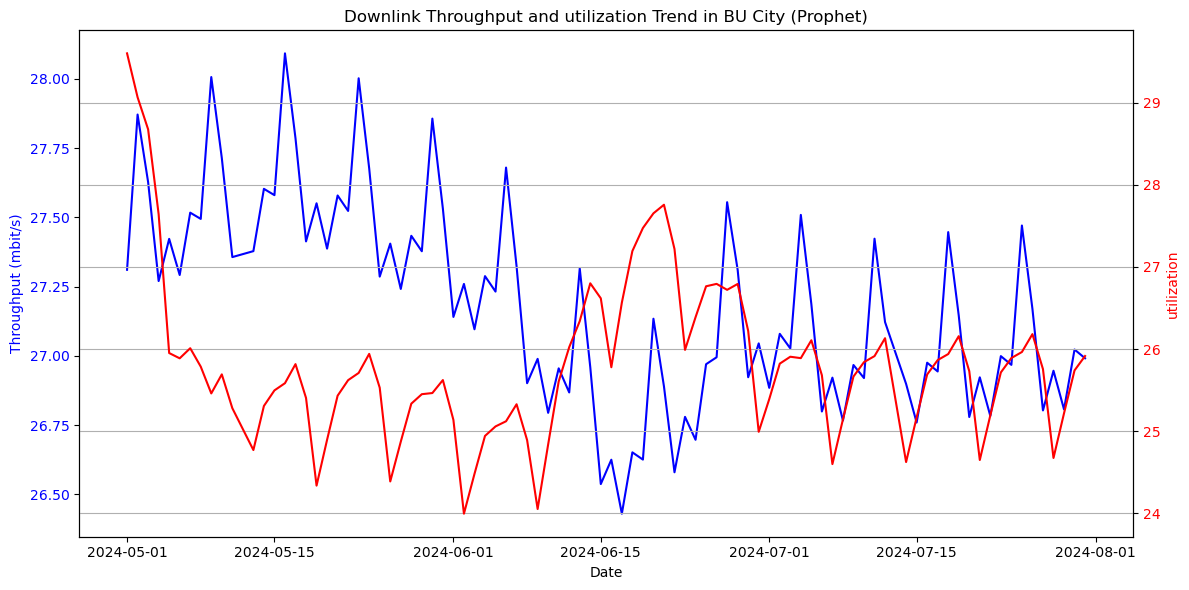

In [114]:
df_bu = df1[df1['city'] == 'BU']

df_throughput = df_bu[['DATETIME', 'average_downlink_user_throughput(mbit/s)']].rename(columns={'DATETIME': 'ds', 'average_downlink_user_throughput(mbit/s)': 'y'})
model_throughput = Prophet()
model_throughput.fit(df_throughput)
forecast_throughput = model_throughput.predict(df_throughput)


df_utilization = df_bu[['DATETIME', 'dl_prb_utilization']].rename(columns={'DATETIME': 'ds', 'dl_prb_utilization': 'y'})
model_utilization = Prophet()
model_utilization.fit(df_utilization)
forecast_utilization = model_utilization.predict(df_utilization)

fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.plot(df_throughput['ds'], forecast_throughput['yhat'], color='b', label='Throughput Trend')
ax1.set_xlabel('Date')
ax1.set_ylabel('Throughput (mbit/s)', color='b')
ax1.tick_params(axis='y', labelcolor='b')

ax2 = ax1.twinx()
ax2.plot(df_utilization['ds'], forecast_utilization['yhat'], color='r', label='utilization Trend')
ax2.set_ylabel('utilization', color='r')
ax2.tick_params(axis='y', labelcolor='r')

plt.title('Downlink Throughput and utilization Trend in BU City (Prophet)')
fig.tight_layout()
plt.grid(True)
plt.savefig("Downlink Throughput and utilization Trend in BU City (Prophet).png",dpi=400)
plt.show()

11:11:28 - cmdstanpy - INFO - Chain [1] start processing
11:11:32 - cmdstanpy - INFO - Chain [1] done processing
11:11:48 - cmdstanpy - INFO - Chain [1] start processing
11:11:52 - cmdstanpy - INFO - Chain [1] done processing


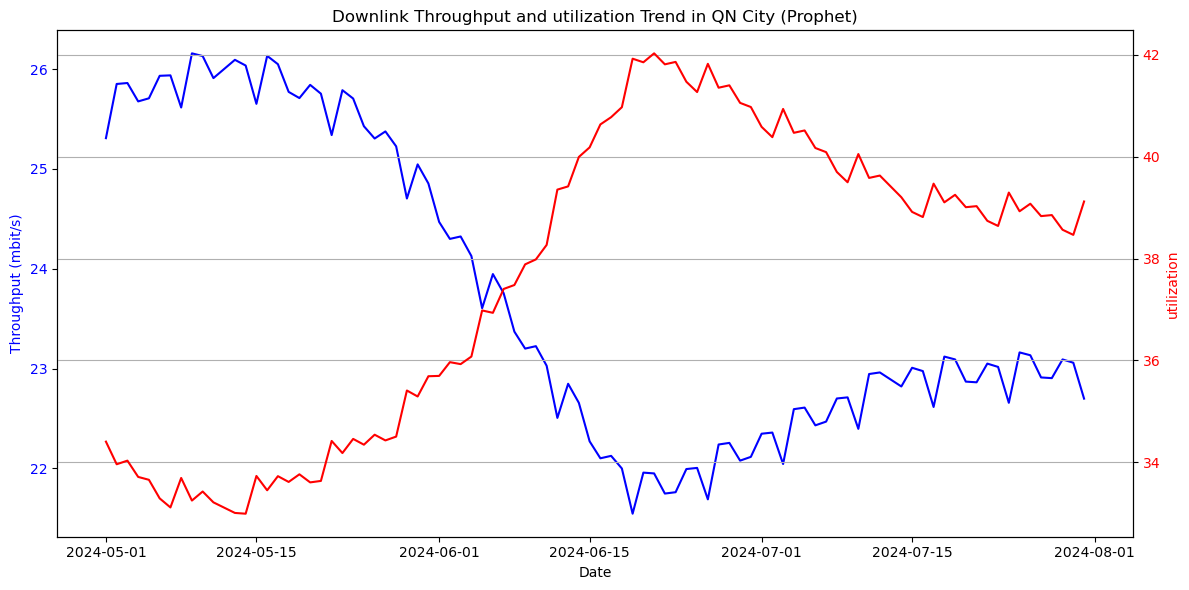

In [115]:
df_bu = df1[df1['city'] == 'QN']

df_throughput = df_bu[['DATETIME', 'average_downlink_user_throughput(mbit/s)']].rename(columns={'DATETIME': 'ds', 'average_downlink_user_throughput(mbit/s)': 'y'})
model_throughput = Prophet()
model_throughput.fit(df_throughput)
forecast_throughput = model_throughput.predict(df_throughput)


df_utilization = df_bu[['DATETIME', 'dl_prb_utilization']].rename(columns={'DATETIME': 'ds', 'dl_prb_utilization': 'y'})
model_utilization = Prophet()
model_utilization.fit(df_utilization)
forecast_utilization = model_utilization.predict(df_utilization)

fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.plot(df_throughput['ds'], forecast_throughput['yhat'], color='b', label='Throughput Trend')
ax1.set_xlabel('Date')
ax1.set_ylabel('Throughput (mbit/s)', color='b')
ax1.tick_params(axis='y', labelcolor='b')

ax2 = ax1.twinx()
ax2.plot(df_utilization['ds'], forecast_utilization['yhat'], color='r', label='utilization Trend')
ax2.set_ylabel('utilization', color='r')
ax2.tick_params(axis='y', labelcolor='r')

plt.title('Downlink Throughput and utilization Trend in QN City (Prophet)')
fig.tight_layout()
plt.grid(True)
plt.savefig("Downlink Throughput and utilization Trend in QN City (Prophet).png",dpi=400)
plt.show()

11:12:50 - cmdstanpy - INFO - Chain [1] start processing
11:12:53 - cmdstanpy - INFO - Chain [1] done processing
11:13:03 - cmdstanpy - INFO - Chain [1] start processing
11:13:06 - cmdstanpy - INFO - Chain [1] done processing


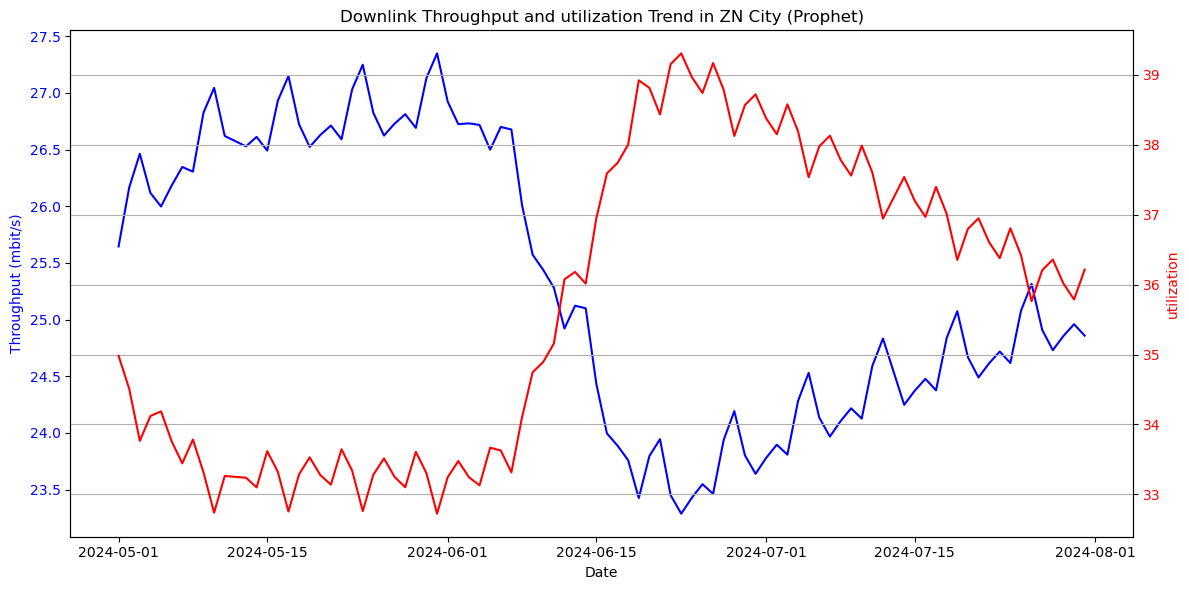

In [116]:
df_bu = df1[df1['city'] == 'ZN']

df_throughput = df_bu[['DATETIME', 'average_downlink_user_throughput(mbit/s)']].rename(columns={'DATETIME': 'ds', 'average_downlink_user_throughput(mbit/s)': 'y'})
model_throughput = Prophet()
model_throughput.fit(df_throughput)
forecast_throughput = model_throughput.predict(df_throughput)


df_utilization = df_bu[['DATETIME', 'dl_prb_utilization']].rename(columns={'DATETIME': 'ds', 'dl_prb_utilization': 'y'})
model_utilization = Prophet()
model_utilization.fit(df_utilization)
forecast_utilization = model_utilization.predict(df_utilization)

fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.plot(df_throughput['ds'], forecast_throughput['yhat'], color='b', label='Throughput Trend')
ax1.set_xlabel('Date')
ax1.set_ylabel('Throughput (mbit/s)', color='b')
ax1.tick_params(axis='y', labelcolor='b')

ax2 = ax1.twinx()
ax2.plot(df_utilization['ds'], forecast_utilization['yhat'], color='r', label='utilization Trend')
ax2.set_ylabel('utilization', color='r')
ax2.tick_params(axis='y', labelcolor='r')

plt.title('Downlink Throughput and utilization Trend in ZN City (Prophet)')
fig.tight_layout()
plt.grid(True)
plt.savefig("Downlink Throughput and utilization Trend in ZN City (Prophet).png",dpi=400)
plt.show()

11:17:30 - cmdstanpy - INFO - Chain [1] start processing
11:17:35 - cmdstanpy - INFO - Chain [1] done processing
11:17:55 - cmdstanpy - INFO - Chain [1] start processing
11:18:01 - cmdstanpy - INFO - Chain [1] done processing


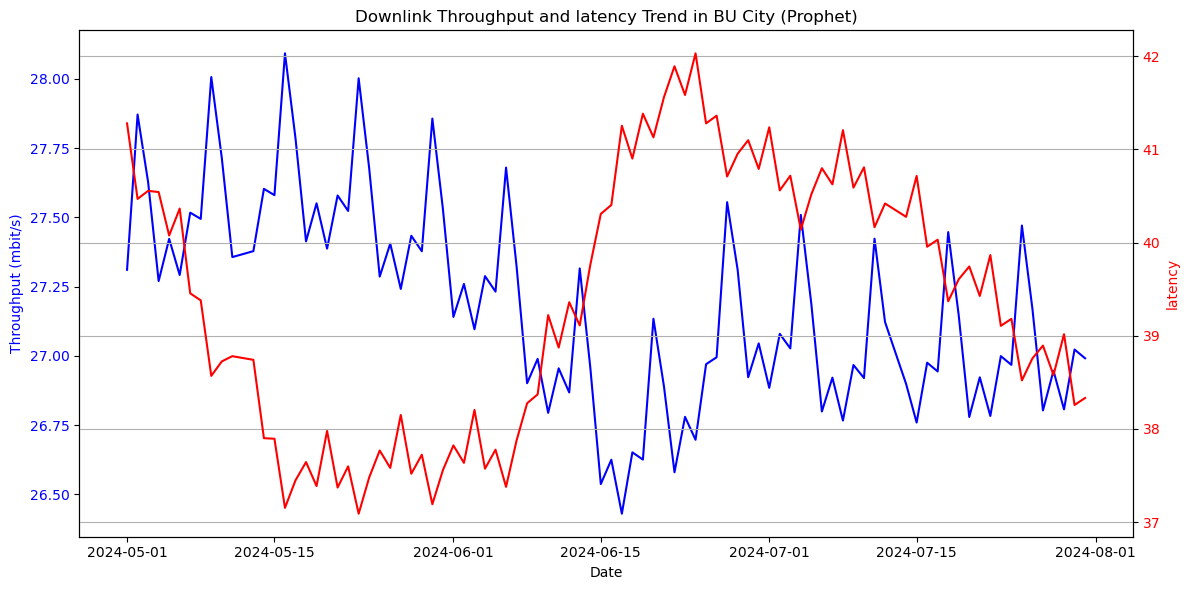

In [117]:
df_bu = df1[df1['city'] == 'BU']

df_throughput = df_bu[['DATETIME', 'average_downlink_user_throughput(mbit/s)']].rename(columns={'DATETIME': 'ds', 'average_downlink_user_throughput(mbit/s)': 'y'})
model_throughput = Prophet()
model_throughput.fit(df_throughput)
forecast_throughput = model_throughput.predict(df_throughput)


df_latency = df_bu[['DATETIME', 'average_dl_latency_ms(huawei_lte_eucell)']].rename(columns={'DATETIME': 'ds', 'average_dl_latency_ms(huawei_lte_eucell)': 'y'})
model_latency = Prophet()
model_latency.fit(df_latency)
forecast_latency = model_latency.predict(df_latency)

fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.plot(df_throughput['ds'], forecast_throughput['yhat'], color='b', label='Throughput Trend')
ax1.set_xlabel('Date')
ax1.set_ylabel('Throughput (mbit/s)', color='b')
ax1.tick_params(axis='y', labelcolor='b')

ax2 = ax1.twinx()
ax2.plot(df_latency['ds'], forecast_latency['yhat'], color='r', label='latency Trend')
ax2.set_ylabel('latency', color='r')
ax2.tick_params(axis='y', labelcolor='r')

plt.title('Downlink Throughput and latency Trend in BU City (Prophet)')
fig.tight_layout()
plt.grid(True)
plt.savefig("Downlink Throughput and latency Trend in BU City (Prophet).png",dpi=400)
plt.show()

11:24:44 - cmdstanpy - INFO - Chain [1] start processing
11:24:49 - cmdstanpy - INFO - Chain [1] done processing
11:25:09 - cmdstanpy - INFO - Chain [1] start processing
11:25:14 - cmdstanpy - INFO - Chain [1] done processing


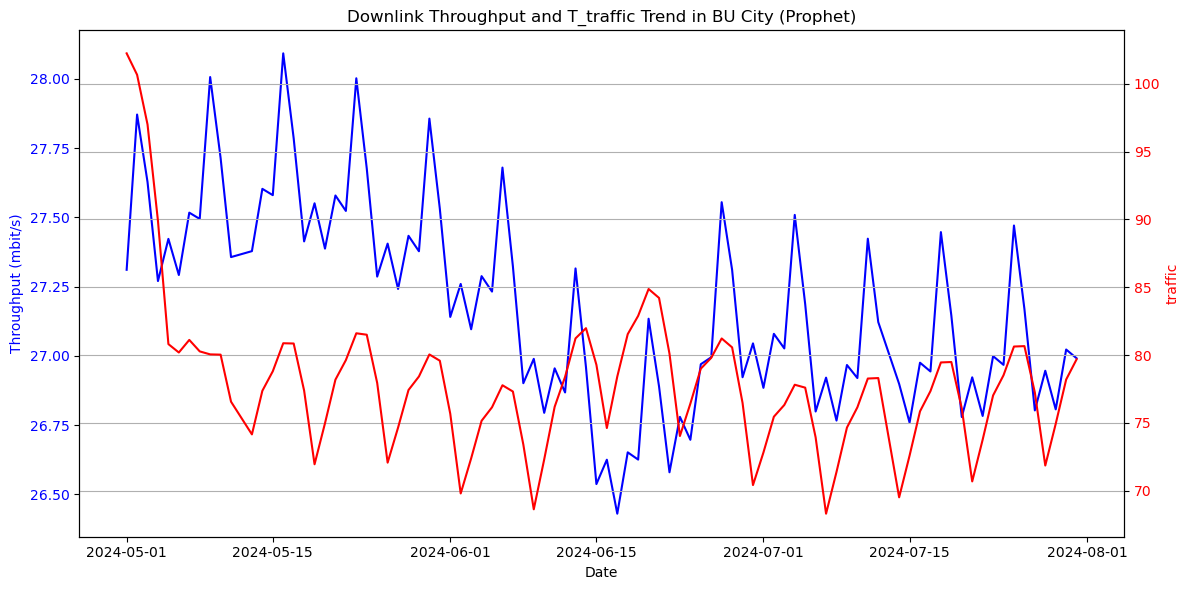

In [120]:
df_bu = df1[df1['city'] == 'BU']

df_throughput = df_bu[['DATETIME', 'average_downlink_user_throughput(mbit/s)']].rename(columns={'DATETIME': 'ds', 'average_downlink_user_throughput(mbit/s)': 'y'})
model_throughput = Prophet()
model_throughput.fit(df_throughput)
forecast_throughput = model_throughput.predict(df_throughput)


df_traffic= df_bu[['DATETIME', 'total_traffic_volume(gb)']].rename(columns={'DATETIME': 'ds', 'total_traffic_volume(gb)': 'y'})
model_traffic = Prophet()
model_traffic.fit(df_traffic)
forecast_traffic = model_traffic.predict(df_traffic)

fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.plot(df_throughput['ds'], forecast_throughput['yhat'], color='b', label='Throughput Trend')
ax1.set_xlabel('Date')
ax1.set_ylabel('Throughput (mbit/s)', color='b')
ax1.tick_params(axis='y', labelcolor='b')

ax2 = ax1.twinx()
ax2.plot(df_traffic['ds'], forecast_traffic['yhat'], color='r', label='traffic Trend')
ax2.set_ylabel('traffic', color='r')
ax2.tick_params(axis='y', labelcolor='r')

plt.title('Downlink Throughput and T_traffic Trend in BU City (Prophet)')
fig.tight_layout()
plt.grid(True)
plt.savefig("Downlink Throughput and T_traffic Trend in BU City (Prophet).png",dpi=400)
plt.show()

11:32:47 - cmdstanpy - INFO - Chain [1] start processing
11:32:53 - cmdstanpy - INFO - Chain [1] done processing
11:33:13 - cmdstanpy - INFO - Chain [1] start processing
11:33:18 - cmdstanpy - INFO - Chain [1] done processing


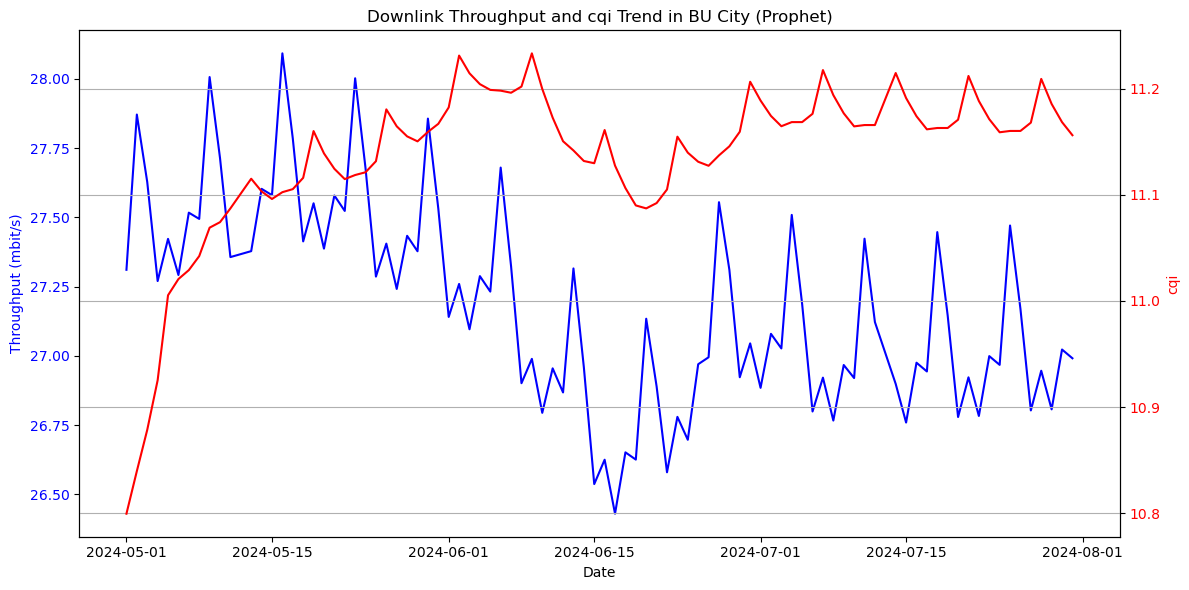

In [123]:
df_bu = df1[df1['city'] == 'BU']

df_throughput = df_bu[['DATETIME', 'average_downlink_user_throughput(mbit/s)']].rename(columns={'DATETIME': 'ds', 'average_downlink_user_throughput(mbit/s)': 'y'})
model_throughput = Prophet()
model_throughput.fit(df_throughput)
forecast_throughput = model_throughput.predict(df_throughput)


df_cqi= df_bu[['DATETIME', 'average_cqi(huawei_lte_cell)']].rename(columns={'DATETIME': 'ds', 'average_cqi(huawei_lte_cell)': 'y'})
model_cqi = Prophet()
model_cqi.fit(df_cqi)
forecast_cqi =  model_cqi.predict(df_cqi)

fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.plot(df_throughput['ds'], forecast_throughput['yhat'], color='b', label='Throughput Trend')
ax1.set_xlabel('Date')
ax1.set_ylabel('Throughput (mbit/s)', color='b')
ax1.tick_params(axis='y', labelcolor='b')

ax2 = ax1.twinx()
ax2.plot(df_cqi['ds'], forecast_cqi['yhat'], color='r', label='cqi Trend')
ax2.set_ylabel('cqi', color='r')
ax2.tick_params(axis='y', labelcolor='r')

plt.title('Downlink Throughput and cqi Trend in BU City (Prophet)')
fig.tight_layout()
plt.grid(True)
plt.savefig("Downlink Throughput and cqi Trend in BU City (Prophet).png",dpi=400)
plt.show()

11:41:42 - cmdstanpy - INFO - Chain [1] start processing
11:41:45 - cmdstanpy - INFO - Chain [1] done processing
11:41:53 - cmdstanpy - INFO - Chain [1] start processing
11:41:59 - cmdstanpy - INFO - Chain [1] done processing


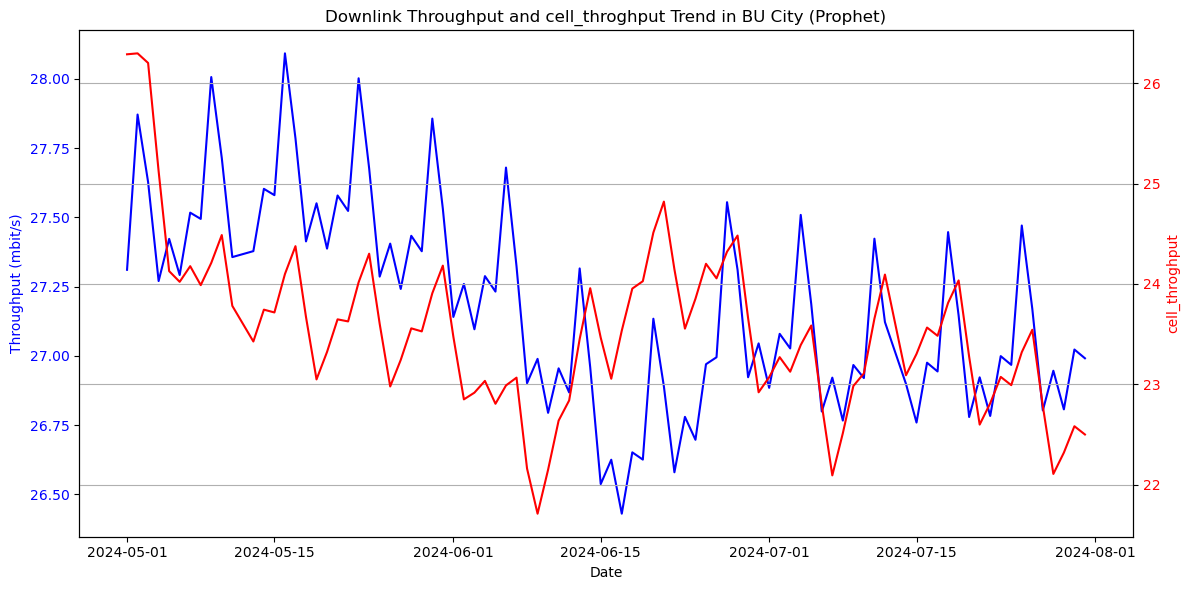

In [125]:
df_bu = df1[df1['city'] == 'BU']

df_throughput = df_bu[['DATETIME', 'average_downlink_user_throughput(mbit/s)']].rename(columns={'DATETIME': 'ds', 'average_downlink_user_throughput(mbit/s)': 'y'})
model_throughput = Prophet()
model_throughput.fit(df_throughput)
forecast_throughput = model_throughput.predict(df_throughput)


df_cell_throghput= df_bu[['DATETIME', 'downlink_cell_throghput(mbit/s)']].rename(columns={'DATETIME': 'ds', 'downlink_cell_throghput(mbit/s)': 'y'})
model_cell_throghput = Prophet()
model_cell_throghput.fit(df_cell_throghput)
forecast_cell_throghput =  model_cell_throghput.predict(df_cell_throghput)

fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.plot(df_throughput['ds'], forecast_throughput['yhat'], color='b', label='Throughput Trend')
ax1.set_xlabel('Date')
ax1.set_ylabel('Throughput (mbit/s)', color='b')
ax1.tick_params(axis='y', labelcolor='b')

ax2 = ax1.twinx()
ax2.plot(df_cell_throghput['ds'], forecast_cell_throghput['yhat'], color='r', label='cell_throghput Trend')
ax2.set_ylabel('cell_throghput', color='r')
ax2.tick_params(axis='y', labelcolor='r')

plt.title('Downlink Throughput and cell_throghput Trend in BU City (Prophet)')
fig.tight_layout()
plt.grid(True)
plt.savefig("Downlink Throughput and cell_throghput Trend in BU City (Prophet).png",dpi=400)
plt.show()

In [126]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [128]:
X = df1[['rssi_pusch(huawei_lte_cell)', 'dl_prb_utilization', 'average_dl_latency_ms(huawei_lte_eucell)', 'total_traffic_volume(gb)','average_ul_packet_loss_%(huawei_lte_ucell)',
       'average_cqi(huawei_lte_cell)']]  
y = df1['average_downlink_user_throughput(mbit/s)']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f'Training set: {X_train.shape}, {y_train.shape}')
print(f'Testing set: {X_test.shape}, {y_test.shape}')

Training set: (53394, 6), (53394,)
Testing set: (13349, 6), (13349,)


In [129]:
X

rssi_pusch(huawei_lte_cell)  dl_prb_utilization  \
0                      -114.331333           49.819667   
1                      -119.139833           26.055000   
2                      -114.850000           44.677167   
3                      -117.138500           45.637667   
4                      -115.613333           54.703333   
...                            ...                 ...   
68647                  -120.255000            7.398667   
68648                  -102.023000            8.651667   
68649                  -108.860333           37.836333   
68650                  -120.250833           17.777667   
68651                  -120.102167            5.801167   

       average_dl_latency_ms(huawei_lte_eucell)  total_traffic_volume(gb)  \
0                                     62.147000                147.424000   
1                                     26.282000                 88.762833   
2                                     57.778000                101.996833   
3                                     78.301667                 96.448833   
4                                     66.473833                154.101167   
...                                         ...                       ...   
68647                                 58.724000                 10.239167   
68648                                 55.889000                 14.129167   
68649                                 54.731333                127.564333   
68650                                 28.036000                 81.298833   
68651                                 37.841167                 20.151333   

       average_ul_packet_loss_%(huawei_lte_ucell)  \
0                                        0.015000   
1                                        0.007000   
2                                        0.005333   
3                                        0.028833   
4                                        0.008667   
...                                           ...   
68647                                    0.011167   
68648                                    0.145500   
68649                                    0.011000   
68650                                    0.000667   
68651                                    0.012167   

       average_cqi(huawei_lte_cell)  
0                          8.028333  
1                         10.261667  
2                          7.909833  
3                          8.621667  
4                          8.372833  
...                             ...  
68647                     11.522333  
68648                     11.695667  
68649                     10.809333  
68650                     12.655833  
68651                     12.236667  

[66743 rows x 6 columns]

In [130]:
y

0        13.071000
1        26.299833
2        14.087333
3        11.330833
4        11.176000
           ...    
68647    28.677167
68648    21.724333
68649    14.065667
68650    45.547833
68651    45.341500
Name: average_downlink_user_throughput(mbit/s), Length: 66743, dtype: float64

In [132]:
#LinearRegression 

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model_log = LinearRegression()
model_log.fit(X_train_scaled, y_train)

y_log_prediction= model_log.predict(X_test_scaled)

# Mean Squared Error
mse_log = mean_squared_error(y_test, y_log_prediction)
print(f'Linear Regression Mean Squared Error: {mse_log}')

Linear Regression Mean Squared Error: 19.683791515207066


In [136]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Mean Absolute Error
mae_log = mean_absolute_error(y_test, y_log_prediction)
print(f'Mean Absolute Error (MAE): {mae_log}')

# Root Mean Squared Error
rmse_log = np.sqrt(mean_squared_error(y_test, y_log_prediction))
print(f'Root Mean Squared Error (RMSE): {rmse_log}')

# R²
r2_log = r2_score(y_test, y_log_prediction)
print(f'R²: {r2_log}')

Mean Absolute Error (MAE): 3.1763769935411528
Root Mean Squared Error (RMSE): 4.4366419187497055
R²: 0.793323571786717


Coefficients for each feature:
rssi_pusch(huawei_lte_cell): -1.7495134671416965
dl_prb_utilization: -6.034754894157836
average_dl_latency_ms(huawei_lte_eucell): -0.7492493296037094
total_traffic_volume(gb): 2.172661314658374
average_ul_packet_loss_%(huawei_lte_ucell): -0.7345326650853294
average_cqi(huawei_lte_cell): 4.218798588941809


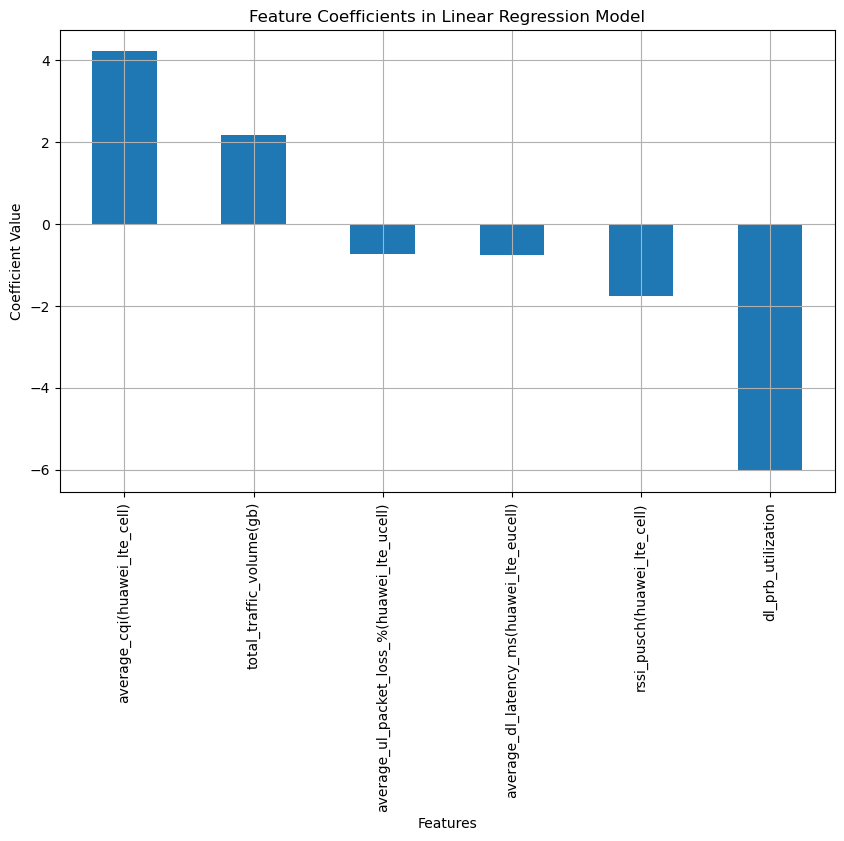

In [140]:
coefficients = model_log.coef_
print("Coefficients for each feature:")
for feature, coef in zip(X.columns, coefficients):
    print(f"{feature}: {coef}")

weights = pd.Series(model_log.coef_, index=X.columns.values)
weights.sort_values(ascending=False).plot(kind='bar', figsize=(10,6))
plt.title('Feature Coefficients in Linear Regression Model')
plt.ylabel('Coefficient Value')
plt.xlabel('Features')
plt.grid(True)
plt.savefig("Feature Coefficients in Linear Regression Model.png",dpi=400)
plt.show()

In [141]:
from sklearn.ensemble import RandomForestRegressor

# Random Forest Regressor
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)

model_rf.fit(X_train_scaled, y_train)

y_rf_prediction = model_rf.predict(X_test_scaled)

In [142]:
# Mean Squared Error
mse_rf = mean_squared_error(y_test, y_rf_prediction)
print(f'Random Forest Mean Squared Error: {mse_rf}')

# Mean Absolute Error 
mae_rf = mean_absolute_error(y_test, y_rf_prediction)
print(f'Random Forest Mean Absolute Error (MAE): {mae_rf}')

# Root Mean Squared Error
rmse_rf = np.sqrt(mse_rf)
print(f'Random Forest Root Mean Squared Error (RMSE): {rmse_rf}')

# R²
r2_rf = r2_score(y_test, y_rf_prediction)
print(f'Random Forest R²: {r2_rf}')

Random Forest Mean Squared Error: 7.602161091518363
Random Forest Mean Absolute Error (MAE): 1.9186598331959948
Random Forest Root Mean Squared Error (RMSE): 2.757201677701209
Random Forest R²: 0.9201786149846609


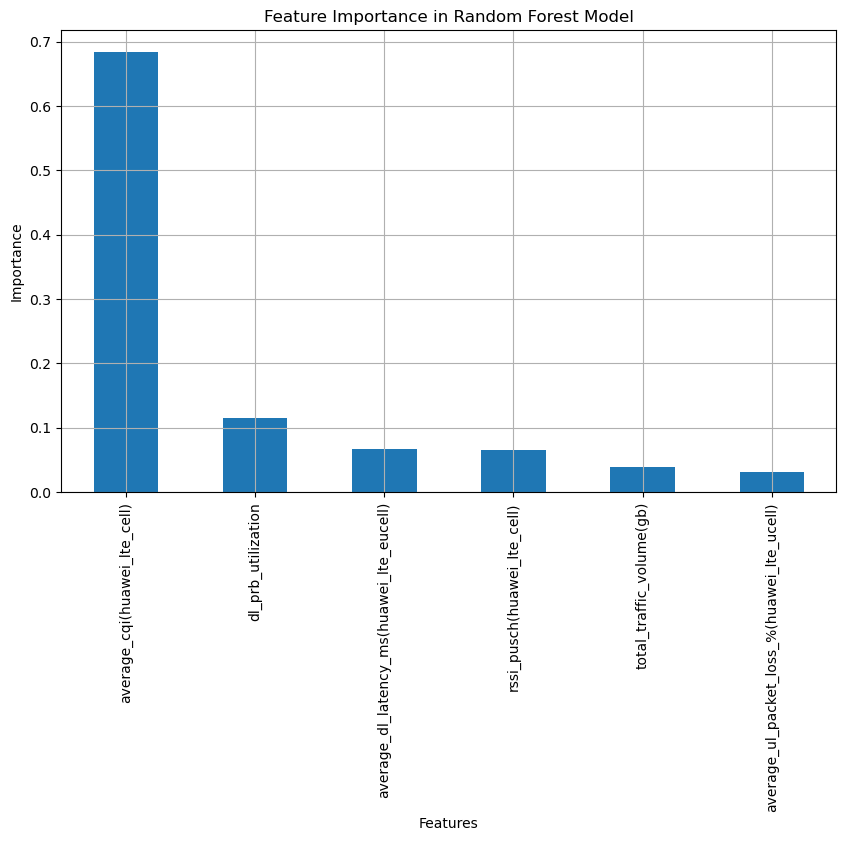

In [143]:
# Feature Importance

importances = model_rf.feature_importances_
weights_rf = pd.Series(importances, index=X.columns.values)
weights_rf.sort_values(ascending=False).plot(kind='bar', figsize=(10,6))
plt.title('Feature Importance in Random Forest Model')
plt.ylabel('Importance')
plt.xlabel('Features')
plt.grid(True)
plt.savefig("Feature Importance in Random Forest Model.png", dpi=400)
plt.show()

In [144]:
from sklearn.svm import SVR


# Support Vector Regressor
model_svr = SVR(kernel='rbf')

model_svr.fit(X_train_scaled, y_train)

y_svr_prediction = model_svr.predict(X_test_scaled)

In [145]:
# Mean Squared Error
mse_svr = mean_squared_error(y_test, y_svr_prediction)
print(f'Random Forest Mean Squared Error: {mse_svr}')

# Mean Absolute Error 
mae_svr = mean_absolute_error(y_test, y_svr_prediction)
print(f'Random Forest Mean Absolute Error (MAE): {mae_svr}')

# Root Mean Squared Error
rmse_svr = np.sqrt(mse_svr)
print(f'Random Forest Root Mean Squared Error (RMSE): {rmse_svr}')

# R²
r2_svr= r2_score(y_test, y_svr_prediction)
print(f'Random Forest R²: {r2_svr}')

Random Forest Mean Squared Error: 11.239577325017313
Random Forest Mean Absolute Error (MAE): 2.350079676766927
Random Forest Root Mean Squared Error (RMSE): 3.3525478855666346
Random Forest R²: 0.8819863696297056


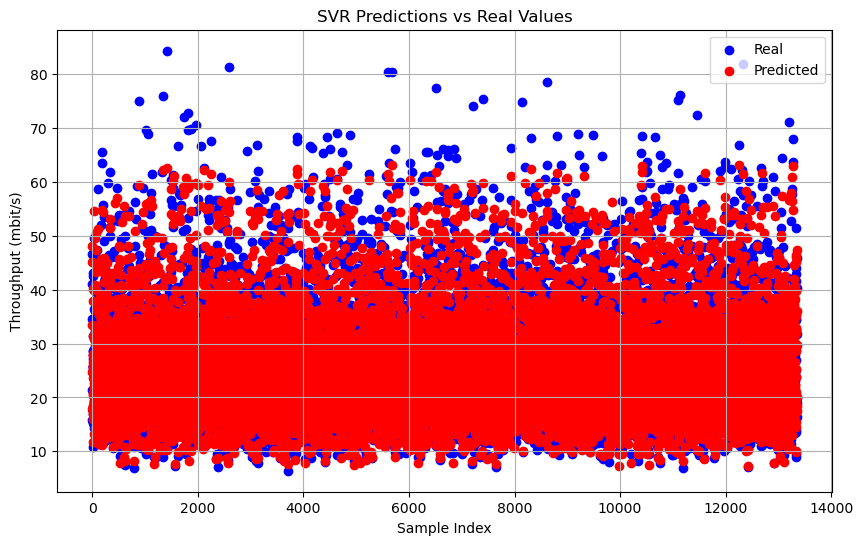

In [146]:

plt.figure(figsize=(10,6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Real')
plt.scatter(range(len(y_test)), y_svr_prediction, color='red', label='Predicted')
plt.title('SVR Predictions vs Real Values')
plt.xlabel('Sample Index')
plt.ylabel('Throughput (mbit/s)')
plt.legend()
plt.grid(True)
plt.savefig("SVR Predictions vs Real Values.png", dpi=400)
plt.show()

In [147]:
results = {
    'Model': ['Linear Regression', 'Random Forest', 'SVR'],
    'MSE': [mse_log, mse_rf, mse_svr],
    'MAE': [mae_log, mae_rf, mae_svr],
    'RMSE': [rmse_log, rmse_rf, rmse_svr],
    'R²': [r2_log, r2_rf, r2_svr]
}

df_results = pd.DataFrame(results)

print(df_results)

               Model        MSE       MAE      RMSE        R²
0  Linear Regression  19.683792  3.176377  4.436642  0.793324
1      Random Forest   7.602161  1.918660  2.757202  0.920179
2                SVR  11.239577  2.350080  3.352548  0.881986


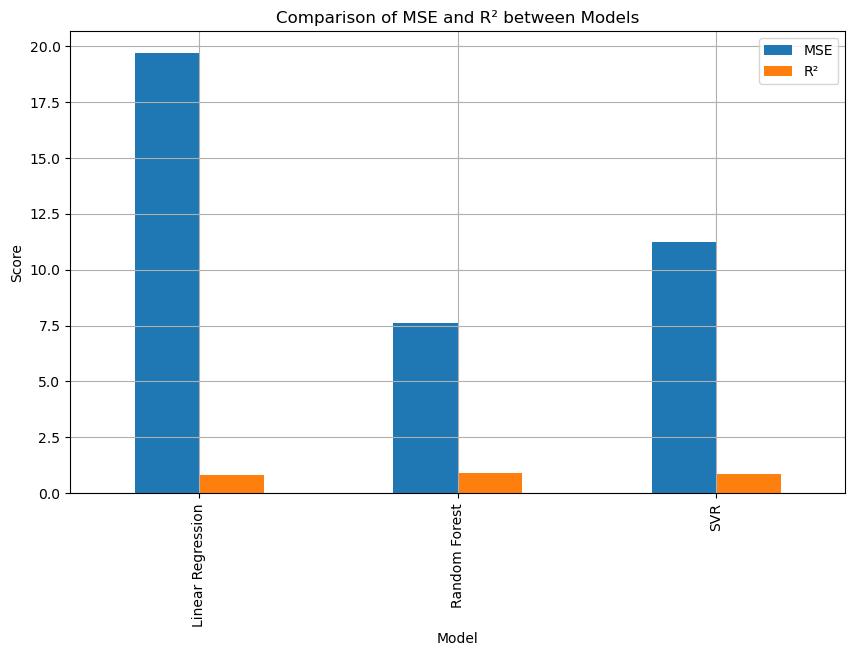

In [150]:

df_results.set_index('Model')[['MSE', 'R²']].plot(kind='bar', figsize=(10,6), grid=True)
plt.title('Comparison of MSE and R² between Models')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.savefig("Comparison_of_MSE_R2_between_Models.png", dpi=400)
plt.show()